In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from ucimlrepo import fetch_ucirepo 
import time
from itertools import product

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from scipy.stats import kurtosis
from sklearn.decomposition import FastICA
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
from sklearn.manifold import Isomap
from sklearn import manifold

from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier

from multiprocessing import Pool

In [3]:
# fetch dataset 
statlog_landsat_satellite = fetch_ucirepo(id=146) 
  
# data (as pandas dataframes) 
X_df = statlog_landsat_satellite.data.features 
y_df = statlog_landsat_satellite.data.targets 
  
# metadata 
print(statlog_landsat_satellite.metadata) 
  
# variable information 
print(statlog_landsat_satellite.variables) 

print(X_df)
print(y_df)

{'uci_id': 146, 'name': 'Statlog (Landsat Satellite)', 'repository_url': 'https://archive.ics.uci.edu/dataset/146/statlog+landsat+satellite', 'data_url': 'https://archive.ics.uci.edu/static/public/146/data.csv', 'abstract': 'Multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification associated with the central pixel in each neighbourhood', 'area': 'Climate and Environment', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 6435, 'num_features': 36, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C55887', 'creators': ['Ashwin Srinivasan'], 'intro_paper': None, 'additional_info': {'summary': "The database consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification as

In [3]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Attribute1   6435 non-null   int64
 1   Attribute2   6435 non-null   int64
 2   Attribute3   6435 non-null   int64
 3   Attribute4   6435 non-null   int64
 4   Attribute5   6435 non-null   int64
 5   Attribute6   6435 non-null   int64
 6   Attribute7   6435 non-null   int64
 7   Attribute8   6435 non-null   int64
 8   Attribute9   6435 non-null   int64
 9   Attribute10  6435 non-null   int64
 10  Attribute11  6435 non-null   int64
 11  Attribute12  6435 non-null   int64
 12  Attribute13  6435 non-null   int64
 13  Attribute14  6435 non-null   int64
 14  Attribute15  6435 non-null   int64
 15  Attribute16  6435 non-null   int64
 16  Attribute17  6435 non-null   int64
 17  Attribute18  6435 non-null   int64
 18  Attribute19  6435 non-null   int64
 19  Attribute20  6435 non-null   int64
 20  Attribut

In [4]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   6435 non-null   int64
dtypes: int64(1)
memory usage: 50.4 KB


In [4]:
print('Classes')
print(y_df.groupby(['class'])['class'].count())

Classes
class
1    1533
2     703
3    1358
4     626
5     707
7    1508
Name: class, dtype: int64


In [5]:
data_df = pd.concat([X_df, y_df], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Attribute1   6435 non-null   int64
 1   Attribute2   6435 non-null   int64
 2   Attribute3   6435 non-null   int64
 3   Attribute4   6435 non-null   int64
 4   Attribute5   6435 non-null   int64
 5   Attribute6   6435 non-null   int64
 6   Attribute7   6435 non-null   int64
 7   Attribute8   6435 non-null   int64
 8   Attribute9   6435 non-null   int64
 9   Attribute10  6435 non-null   int64
 10  Attribute11  6435 non-null   int64
 11  Attribute12  6435 non-null   int64
 12  Attribute13  6435 non-null   int64
 13  Attribute14  6435 non-null   int64
 14  Attribute15  6435 non-null   int64
 15  Attribute16  6435 non-null   int64
 16  Attribute17  6435 non-null   int64
 17  Attribute18  6435 non-null   int64
 18  Attribute19  6435 non-null   int64
 19  Attribute20  6435 non-null   int64
 20  Attribut

In [6]:
# count the duplicated cases
data_df.duplicated().sum()

0

In [7]:
nans = data_df.isna()
print('Missing values')
print(nans.sum(axis=0))

Missing values
Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
Attribute21    0
Attribute22    0
Attribute23    0
Attribute24    0
Attribute25    0
Attribute26    0
Attribute27    0
Attribute28    0
Attribute29    0
Attribute30    0
Attribute31    0
Attribute32    0
Attribute33    0
Attribute34    0
Attribute35    0
Attribute36    0
class          0
dtype: int64


<Axes: >

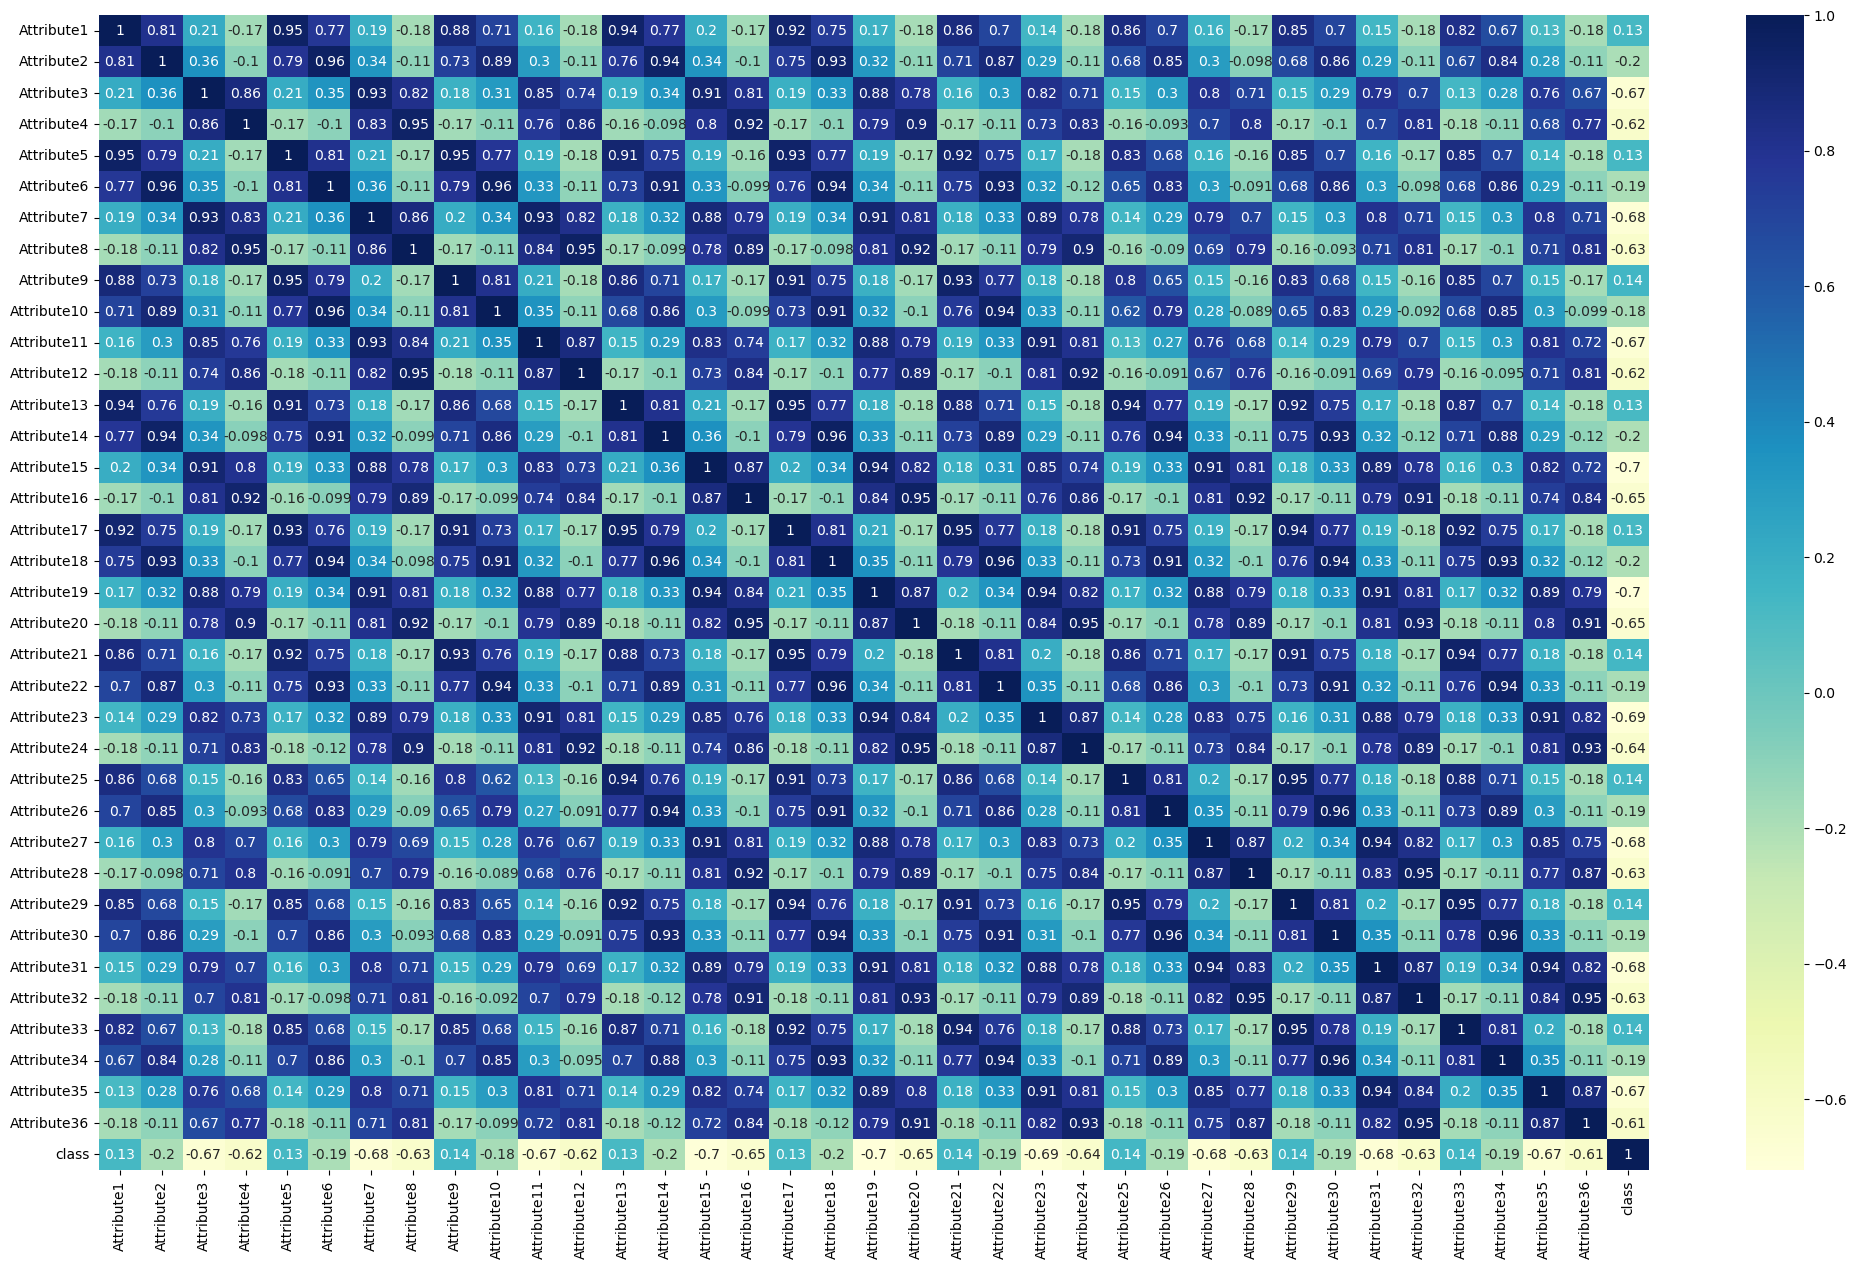

In [8]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(data_df.corr(),annot=True,cmap="YlGnBu" , ax=ax)

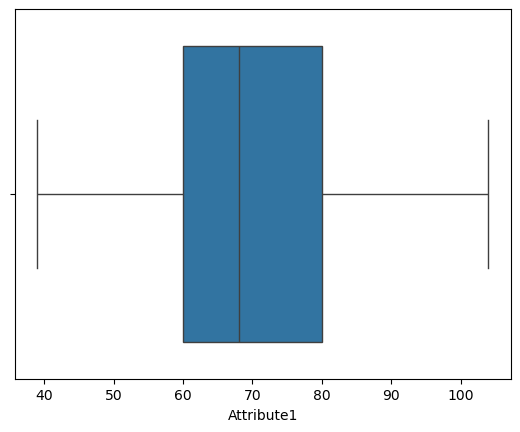

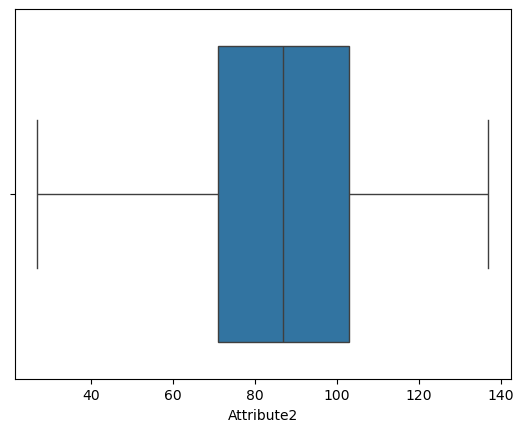

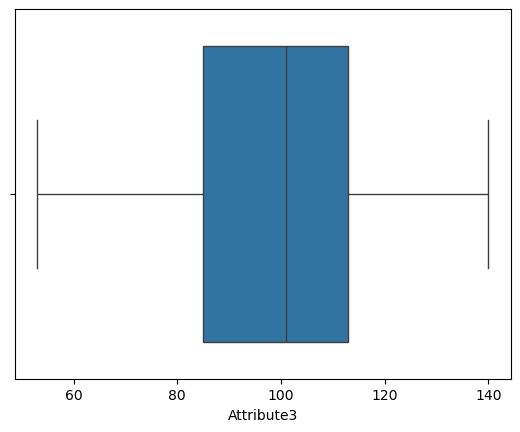

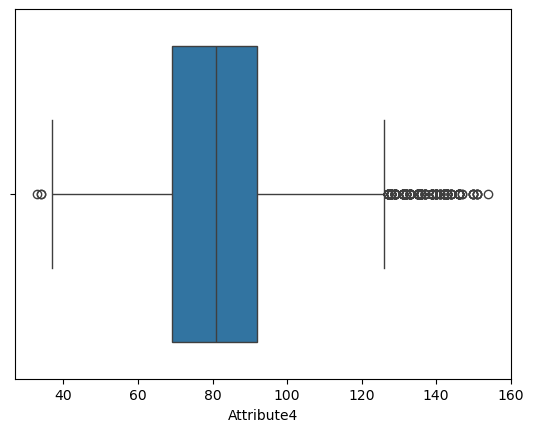

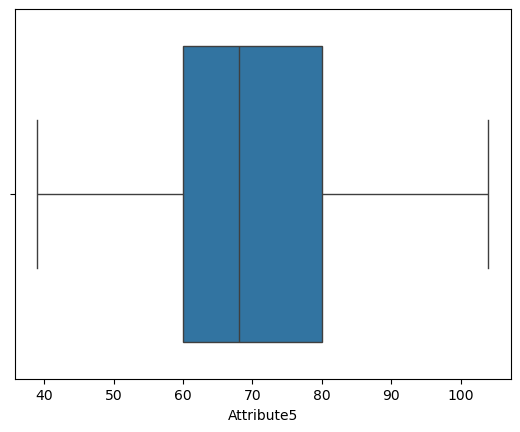

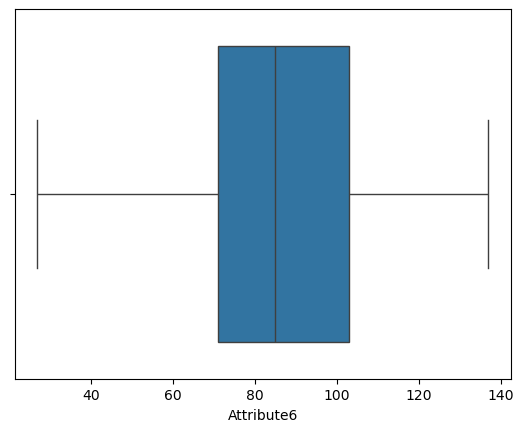

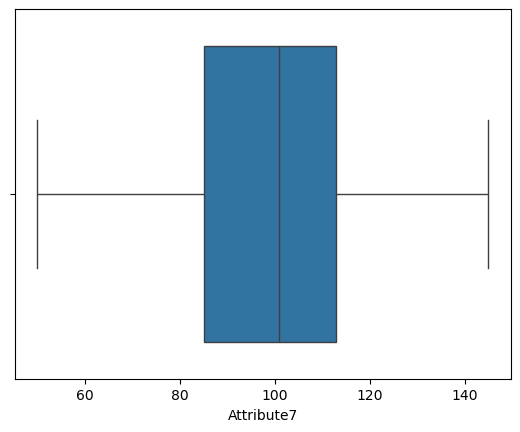

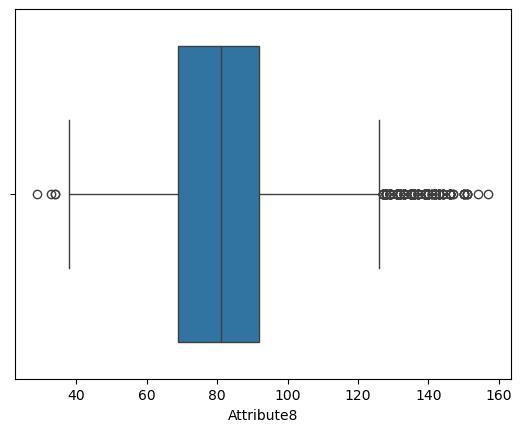

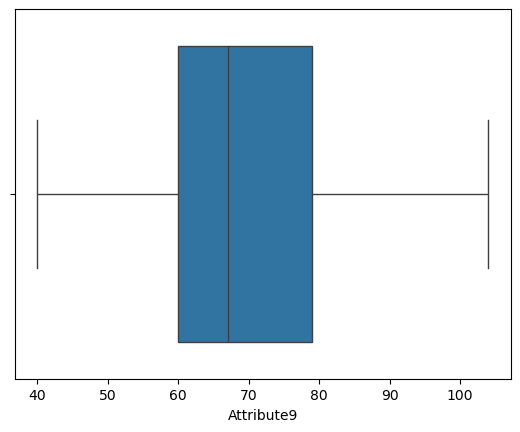

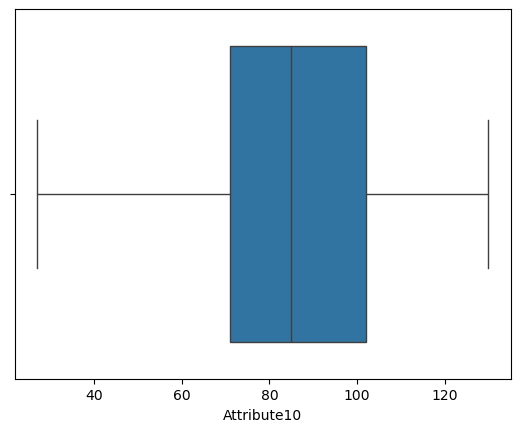

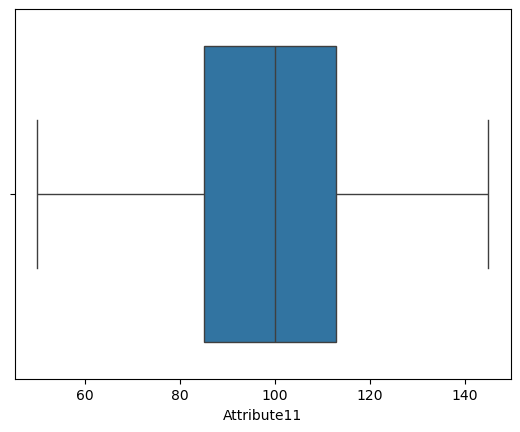

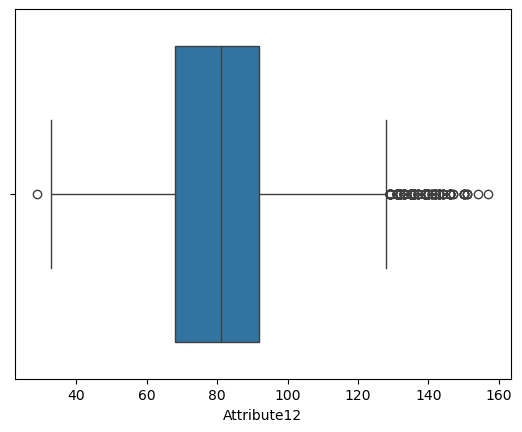

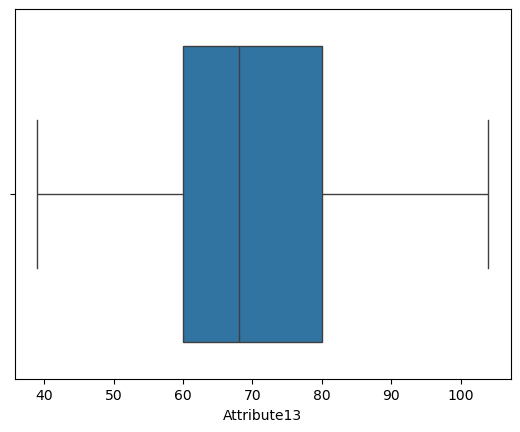

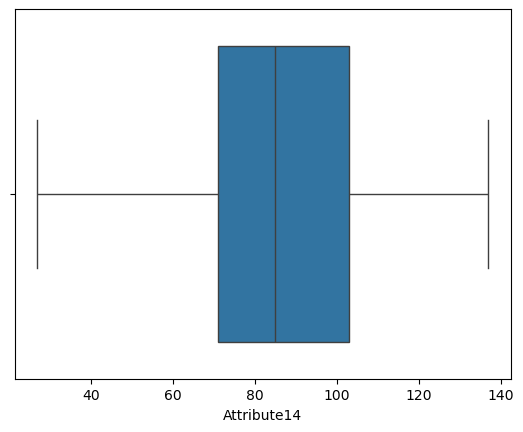

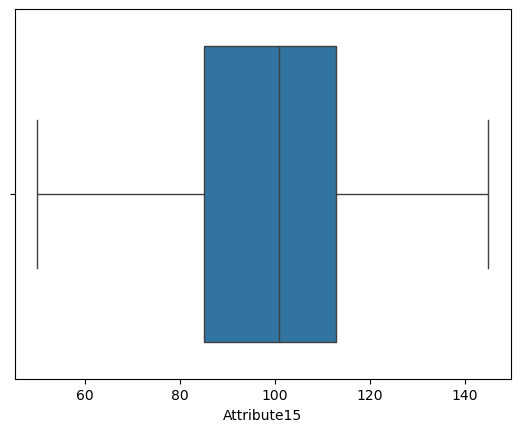

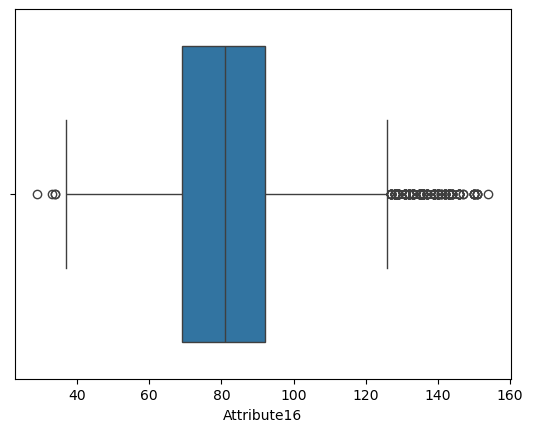

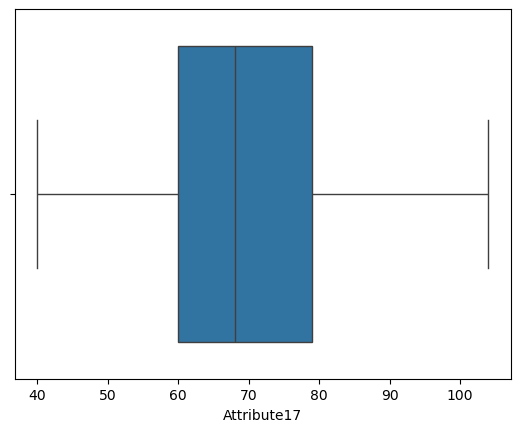

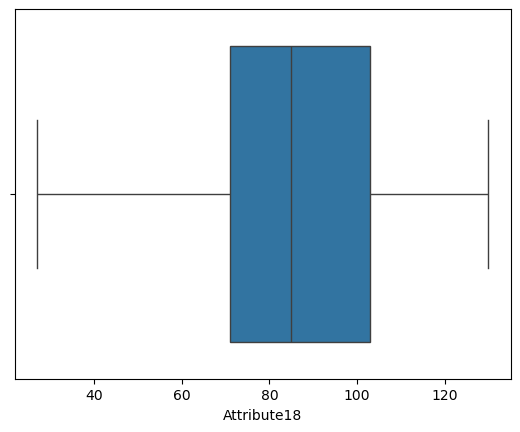

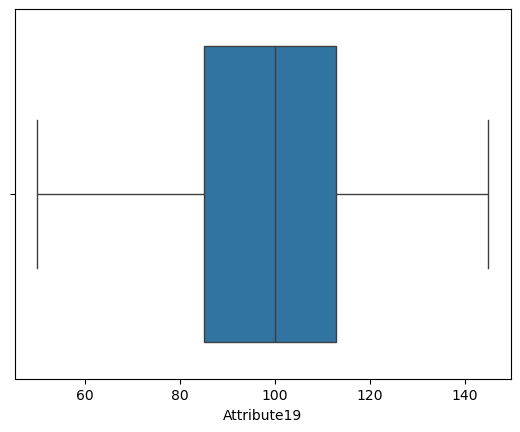

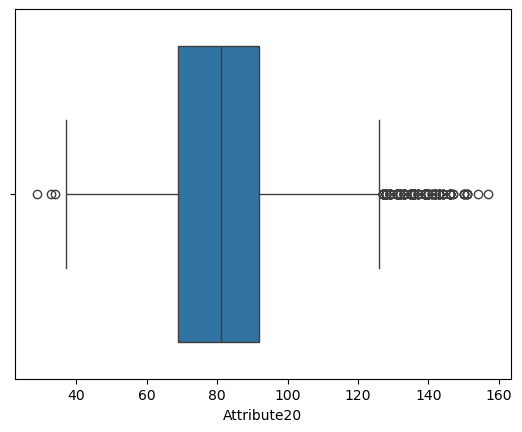

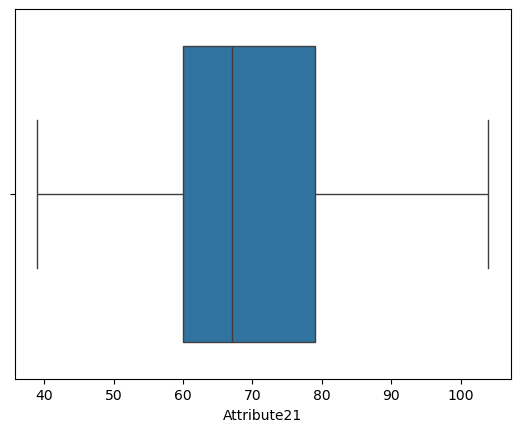

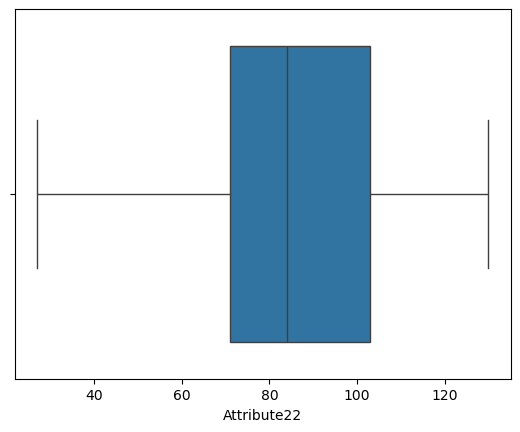

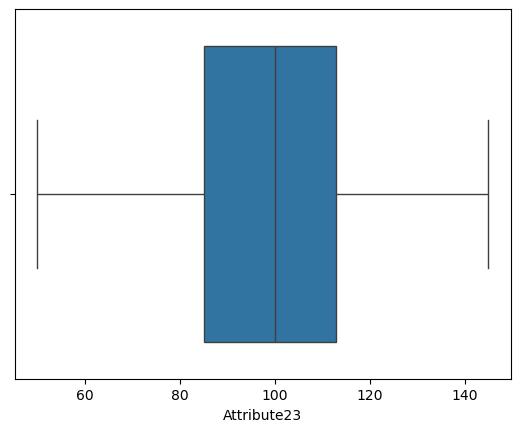

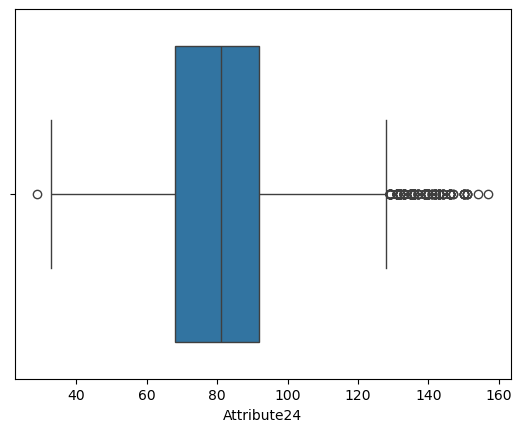

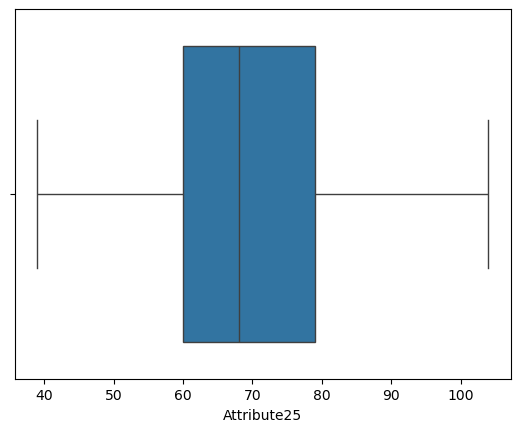

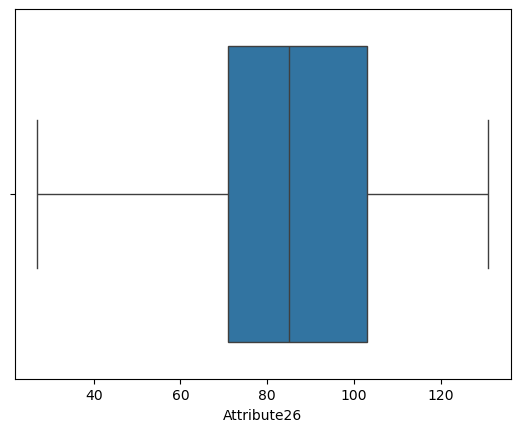

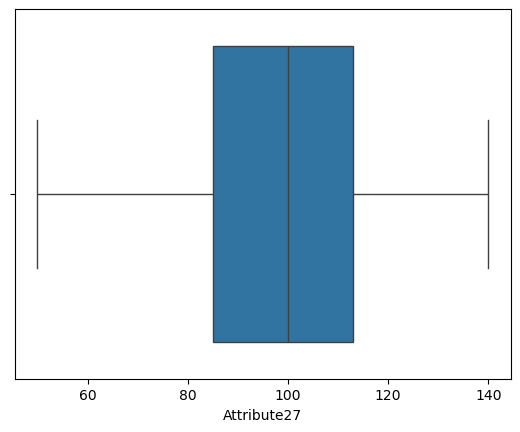

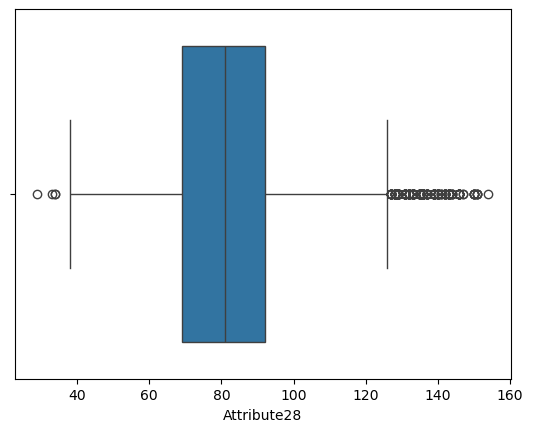

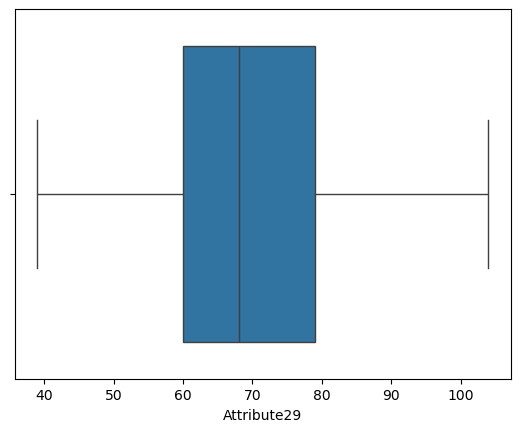

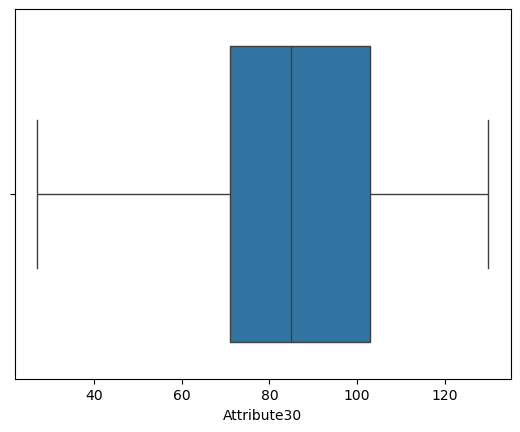

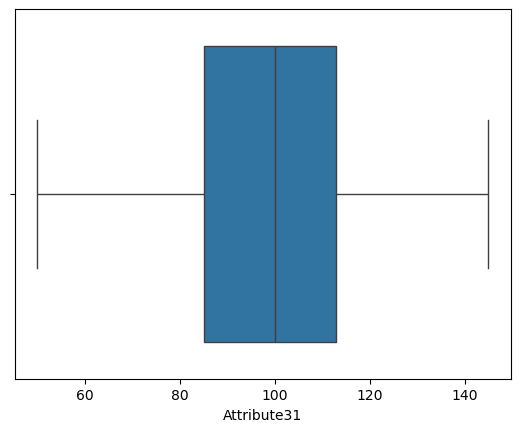

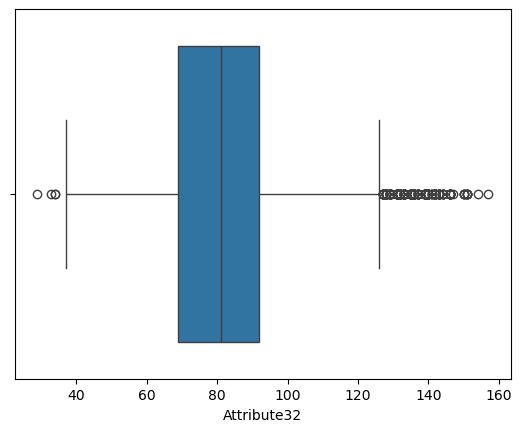

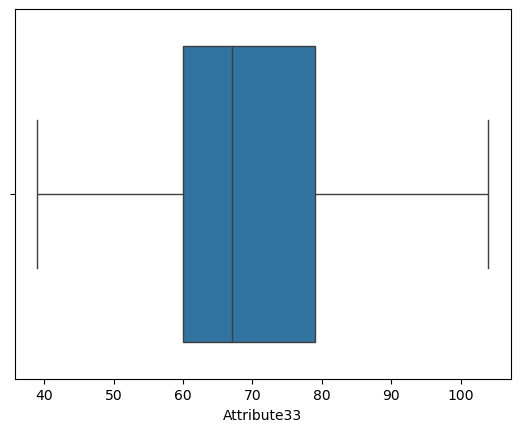

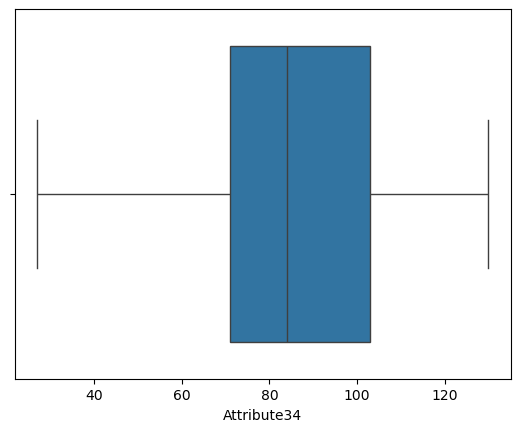

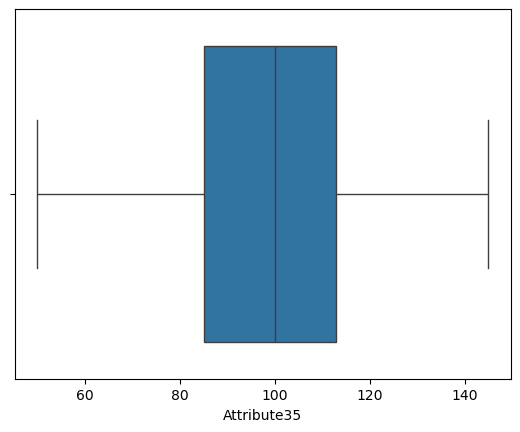

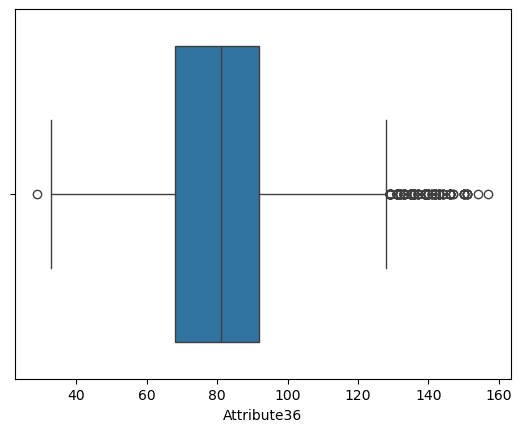

In [25]:
# Box plots for outliers
i = 0
for x in list(data_df.columns)[0:-1]:
    i += 1
    plt.figure(i)
    sns.boxplot(x=data_df[x])
    plt.show()
    plt.close()

In [10]:
#for col in list(X_df.columns):
#
#    # Calculate quantiles
#    Q1 = data_df[col].quantile(0.25)
#    Q3 = data_df[col].quantile(0.75)
#    IQR = Q3 - Q1
#    # Calculate upper and lower bounds
#    upper_bound = Q3 + 1.5 * IQR
#    lower_bound = Q1 - 1.5 * IQR
#    # Identify outliers
#    outliers = data_df[(data_df[col] > upper_bound) | (data_df[col] < lower_bound)]
#    # Remove outliers
#    data_df = data_df[(data_df[col] <= upper_bound) & (data_df[col] >= lower_bound)]
#
#print('Data counts without the outliers')
#print(data_df.groupby(['class'])['class'].count())

Data counts without the outliers
class
1    1527
2      77
3    1354
4     623
5     667
7    1506
Name: class, dtype: int64


In [8]:
# Feature df
X_df = data_df.copy()
X_df.drop(['class'], axis=1, inplace=True)

X = X_df.values
y = data_df['class'].values

seed = 903946366

# Shuffle data and then split into the training and the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = seed, 
                                                    stratify = y)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_orig = X_train
X_test_orig = X_test

### ORIGINAL DATA

logistic
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9847942102422195 at 19 nodes
Maximum accuracy score: 0.893427056357134 at 19 nodes


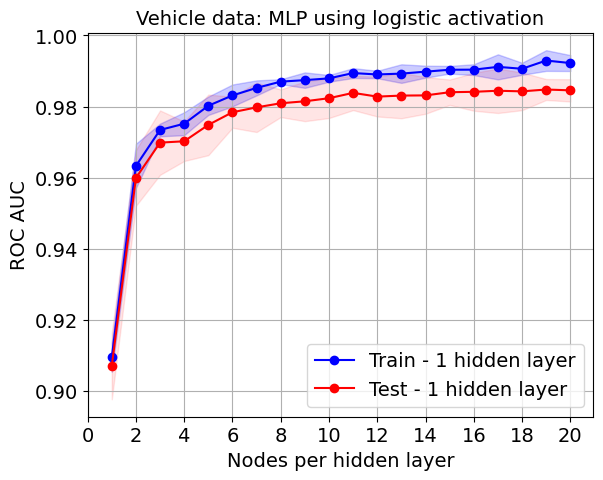

tanh
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9849757401645045 at 18 nodes
Maximum accuracy score: 0.8916542113700826 at 18 nodes


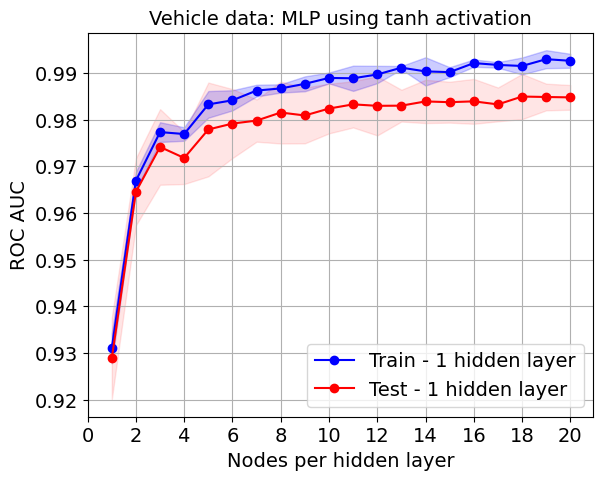

relu
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9860705304777075 at 19 nodes
Maximum accuracy score: 0.8983139721297324 at 19 nodes


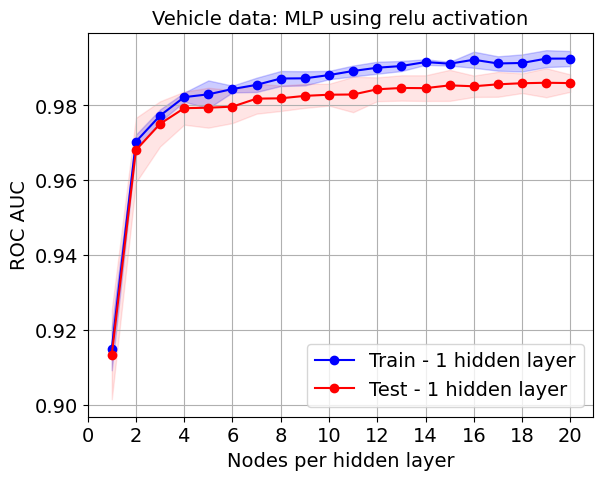

In [26]:
X_train = X_train_orig

activation_list = ['logistic', 'tanh', 'relu']

for activation in activation_list:
    
    print(activation)
    
    ########################
    ## 1 hidden layers
    ########################
    
    train_acc_m = []
    train_acc_std = []
    test_acc_m = []
    test_acc_std = []

    train_roc_m = []
    train_roc_std = []
    test_roc_m = []
    test_roc_std = []
    
    alpha = 0.0001 # default 0.0001
    max_iter = 4000 # default 200
    hidden_layers = 1
    print(f'MLP with {hidden_layers} hidden layers')
    
    nodes_list = list(range(1,21,1))
    
    for nodes in nodes_list:
        #print(f'{nodes} nodes')
        hidden_layer_sizes = tuple([nodes])*hidden_layers
        clf = MLPClassifier(solver='adam', alpha=alpha,
                            hidden_layer_sizes=hidden_layer_sizes, 
                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
        
        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                                n_jobs=12)
        
    #    for estimator in scores['estimator']:
    #        print(estimator.loss_)
        
        # train and test accuracy
        train_acc_m.append(np.mean(scores['train_accuracy']))
        train_acc_std.append(np.std(scores['train_accuracy']))
        test_acc_m.append(np.mean(scores['test_accuracy']))  
        test_acc_std.append(np.std(scores['test_accuracy']))
                            
        # train and test roc auc
        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
    
    train_acc_m_mlp1 = np.asarray(train_acc_m)
    train_acc_std_mlp1 = np.asarray(train_acc_std)
    test_acc_m_mlp1 = np.asarray(test_acc_m)
    test_acc_std_mlp1 = np.asarray(test_acc_std) 
    
    train_roc_m_mlp1 = np.asarray(train_roc_m)
    train_roc_std_mlp1 = np.asarray(train_roc_std)
    test_roc_m_mlp1 = np.asarray(test_roc_m)
    test_roc_std_mlp1 = np.asarray(test_roc_std)
    
    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
#    ########################
#    ## 2 hidden layers
#    ########################
#    
#    train_acc_m = []
#    train_acc_std = []
#    test_acc_m = []
#    test_acc_std = []
#    
#    train_roc_m = []
#    train_roc_std = []
#    test_roc_m = []
#    test_roc_std = []
#    
#    alpha = 0.0001 # default 0.0001
#    max_iter = 4000 # default 200
#    hidden_layers = 2
#    print(f'MLP with {hidden_layers} hidden layers')
#    
#    nodes_list = list(range(1,21,1))
#    
#    for nodes in nodes_list:
#    #    print(f'{nodes} nodes')
#        hidden_layer_sizes = tuple([nodes])*hidden_layers
#        clf = MLPClassifier(solver='adam', alpha=alpha,
#                            hidden_layer_sizes=hidden_layer_sizes, 
#                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
#        
#        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
#                                n_jobs=8)
#        
#    #    for estimator in scores['estimator']:
#    #        print(estimator.loss_)
#        
#        # train and test accuracy
#        train_acc_m.append(np.mean(scores['train_accuracy']))
#        train_acc_std.append(np.std(scores['train_accuracy']))
#        test_acc_m.append(np.mean(scores['test_accuracy']))  
#        test_acc_std.append(np.std(scores['test_accuracy']))
#                            
#        # train and test roc auc
#        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
#        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
#        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
#        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
#    
#    train_acc_m_mlp2 = np.asarray(train_acc_m)
#    train_acc_std_mlp2 = np.asarray(train_acc_std)
#    test_acc_m_mlp2 = np.asarray(test_acc_m)
#    test_acc_std_mlp2 = np.asarray(test_acc_std) 
#    
#    train_roc_m_mlp2 = np.asarray(train_roc_m)
#    train_roc_std_mlp2 = np.asarray(train_roc_std)
#    test_roc_m_mlp2 = np.asarray(test_roc_m)
#    test_roc_std_mlp2 = np.asarray(test_roc_std)
#    
#    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
#    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
#    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
    fontsize = 14

    # roc_auc
    fig = plt.figure()
    ax = fig.add_axes([0.15, 0.14, 0.79, 0.80])
    # Uniform weights
    ax.plot(nodes_list, train_roc_m_mlp1, 'o-', color='b', label='Train - 1 hidden layer')
    ax.fill_between(nodes_list, train_roc_m_mlp1 - 2*train_roc_std_mlp1, train_roc_m_mlp1 + 2*train_roc_std_mlp1, 
                    alpha=0.2, color="b")
    
    ax.plot(nodes_list, test_roc_m_mlp1, 'o-', color='r', label='Test - 1 hidden layer')
    ax.fill_between(nodes_list, test_roc_m_mlp1 - 2*test_roc_std_mlp1, test_roc_m_mlp1 + 2*test_roc_std_mlp1, 
                    alpha=0.1, color="r")
    
#    # Distance weights
#    ax.plot(nodes_list, train_roc_m_mlp2, 'o-', color='k', markerfacecolor='none', label='Train - 2 hidden layers')
#    ax.fill_between(nodes_list, train_roc_m_mlp2 - 2*train_roc_std_mlp2, train_roc_m_mlp2 + 2*train_roc_std_mlp2, 
#                    alpha=0.1, color="k")
#    
#    ax.plot(nodes_list, test_roc_m_mlp2, 'o-', color='g', markerfacecolor='none', label='Test - 2 hidden layers')
#    ax.fill_between(nodes_list, test_roc_m_mlp2 - 2*test_roc_std_mlp2, test_roc_m_mlp2 + 2*test_roc_std_mlp2, 
#                    alpha=0.2, color="g")
#    
    ax.legend(fontsize=fontsize, loc='lower right')
    ax.tick_params(labelsize=fontsize)
    ax.set_title(f'Vehicle data: MLP using {activation} activation', fontsize=fontsize) 
    ax.set_xlabel('Nodes per hidden layer', fontsize=fontsize) 
    ax.set_ylabel('ROC AUC', fontsize=fontsize) 
#    ax.set_ylim(0.68, 1.02)
    ax.set_xticks(list(range(0,22,2)))
    plt.grid(True)
    plt.show()
#    fig.savefig(f'mlp-roc_auc-nodes-{activation}.png')
    plt.close(fig)
    

In [112]:
X_train = X_train_orig

#activation_list = ['logistic', 'tanh', 'relu']
activation_list = ['relu']

for activation in activation_list:
    
    print(activation)
    
    ########################
    ## 1 hidden layers
    ########################
    
    train_acc_m = []
    train_acc_std = []
    test_acc_m = []
    test_acc_std = []

    train_roc_m = []
    train_roc_std = []
    test_roc_m = []
    test_roc_std = []
    
    alpha = 0.0001 # default 0.0001
    max_iter = 4000 # default 200
    hidden_layers = 1
    print(f'MLP with {hidden_layers} hidden layers')
    
    nodes_list = list(range(1,21,1))
    
    for nodes in nodes_list:
        #print(f'{nodes} nodes')
        hidden_layer_sizes = tuple([nodes])*hidden_layers
        clf = MLPClassifier(solver='adam', alpha=alpha,
                            hidden_layer_sizes=hidden_layer_sizes, 
                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
        
        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                                n_jobs=5)
        
    #    for estimator in scores['estimator']:
    #        print(estimator.loss_)
        
        # train and test accuracy
        train_acc_m.append(np.mean(scores['train_accuracy']))
        train_acc_std.append(np.std(scores['train_accuracy']))
        test_acc_m.append(np.mean(scores['test_accuracy']))  
        test_acc_std.append(np.std(scores['test_accuracy']))
                            
        # train and test roc auc
        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
    
    train_acc_m_mlp1 = np.asarray(train_acc_m)
    train_acc_std_mlp1 = np.asarray(train_acc_std)
    test_acc_m_mlp1 = np.asarray(test_acc_m)
    test_acc_std_mlp1 = np.asarray(test_acc_std) 
    
    train_roc_m_mlp1 = np.asarray(train_roc_m)
    train_roc_std_mlp1 = np.asarray(train_roc_std)
    test_roc_m_mlp1 = np.asarray(test_roc_m)
    test_roc_std_mlp1 = np.asarray(test_roc_std)
    
    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')

    train_roc_m_orig = train_roc_m_mlp1
    test_roc_m_orig = test_roc_m_mlp1 

    train_roc_std_orig = train_roc_std_mlp1
    test_roc_std_orig = test_roc_std_mlp1 
    

relu
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9860705304777075 at 19 nodes
Maximum accuracy score: 0.8983139721297324 at 19 nodes


In [23]:
# Learning curve with respect to training set size
# Validation set remains the same

X_train = X_train_orig
X_test = X_test_orig

# MLP learning curves
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=[12], 
                    activation='relu', random_state=seed, max_iter=4000, tol=1e-6)
train_sizes = np.arange(5,105,5)*0.01*X_train.shape[0]*0.80
train_sizes = train_sizes.astype(int)
train_sizes_mlp, train_scores_mlp, validation_scores_mlp = learning_curve(
estimator = clf,
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'roc_auc_ovr', shuffle = True, n_jobs=16, random_state=seed)

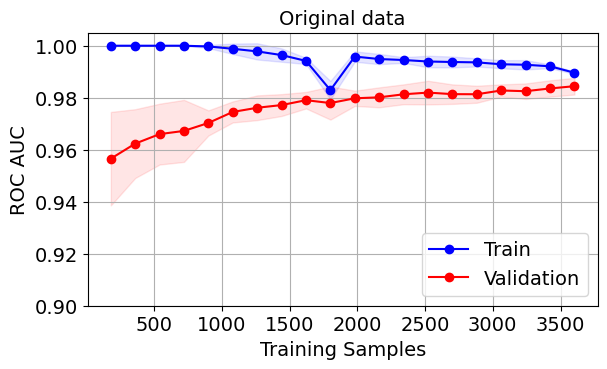

In [43]:
train_mean = train_scores_mlp.mean(axis = 1)
train_std =  train_scores_mlp.std(axis = 1)
test_mean = validation_scores_mlp.mean(axis = 1)
test_std =  validation_scores_mlp.std(axis = 1)

fontsize = 14
fig = plt.figure(figsize=(6,3.5))
ax = fig.add_axes([0.13, 0.15, 0.85, 0.78])
ax.plot(train_sizes_mlp, train_mean, '-o', label='Train', color="b")
ax.fill_between(train_sizes_mlp, train_mean - 2*train_std, train_mean + 2*train_std, 
                alpha=0.1, color="b")
ax.plot(train_sizes_mlp, test_mean, '-o', label='Validation', color="r")
ax.fill_between(train_sizes_mlp, test_mean - 2*test_std, test_mean + 2*test_std, 
                alpha=0.1, color="r")
ax.legend(fontsize=fontsize, loc="lower right")
ax.tick_params(labelsize=fontsize)
ax.set_title('Original data', fontsize=fontsize) 
ax.set_xlabel('Training Samples', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize) 
#ax.set_xlim(0, 500)
ax.set_ylim(0.90, 1.005)
#ax.set_xticks(np.arange(0,600,100))
#ax.set_yticks(np.arange(0.60,1.05,0.05))
plt.grid(True)
plt.show()
fig.savefig('NN_orig_learning_curves.png')
plt.close(fig)

In [150]:
X_train = X_train_orig
X_test = X_test_orig

# MLP
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=[12], 
                    activation='relu', random_state=seed, max_iter=4000, tol=1e-6)

tic = time.perf_counter()
clf.fit(X_train, y_train)
toc = time.perf_counter()
mlp_train_time = toc-tic
train_iter = clf.n_iter_
loss_curve_orig = clf.loss_curve_

tic = time.perf_counter()
y_pred_train_mlp = clf.predict(X_train)
toc = time.perf_counter()
mlp_pred_train_time = toc-tic

tic = time.perf_counter()
y_pred_test_mlp = clf.predict(X_test)
toc = time.perf_counter()
mlp_pred_test_time = toc-tic

train_acc_mlp = accuracy_score(y_train, y_pred_train_mlp)
test_acc_mlp = accuracy_score(y_test, y_pred_test_mlp)

train_roc_mlp = roc_auc_score(y_train, clf.predict_proba(X_train), average='macro', multi_class='ovr')
test_roc_mlp = roc_auc_score(y_test, clf.predict_proba(X_test), average='macro', multi_class='ovr')

print('\nMLP training and test')
print(f'Feature components: {X_train.shape[1]}')
print(f'train accuracy: {train_acc_mlp}') 
print(f'train roc_auc: {train_roc_mlp}')
print(f'test accuracy: {test_acc_mlp}')
print(f'test roc_auc: {test_roc_mlp}') 

print(f'\nIterations to train: {train_iter}')
print(f'Time to train: {mlp_train_time}')
#print(f'Time to predict training set: {mlp_pred_train_time}') 
#print(f'Time to predict test set: {mlp_pred_test_time}') 


MLP training and test
Feature components: 36
train accuracy: 0.9320603907637656
train roc_auc: 0.9920849665946561
test accuracy: 0.8839979285344381
test roc_auc: 0.9809906114154375

Iterations to train: 906
Time to train: 8.297733000013977


### PCA

In [27]:
# SELECT COMPONENTS
pca_components = 6
X_train = X_train_orig
X_test = X_test_orig

pca = PCA(n_components=pca_components, random_state=seed)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

# Transform test set 
X_test_pca = X_test @ np.transpose(pca.components_)

logistic
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9848181826866934 at 17 nodes
Maximum accuracy score: 0.8874369219385867 at 14 nodes


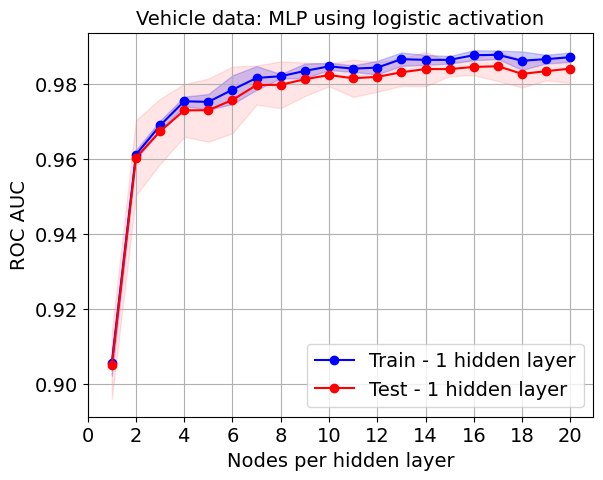

tanh
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9863407582756647 at 20 nodes
Maximum accuracy score: 0.8943186582809226 at 18 nodes


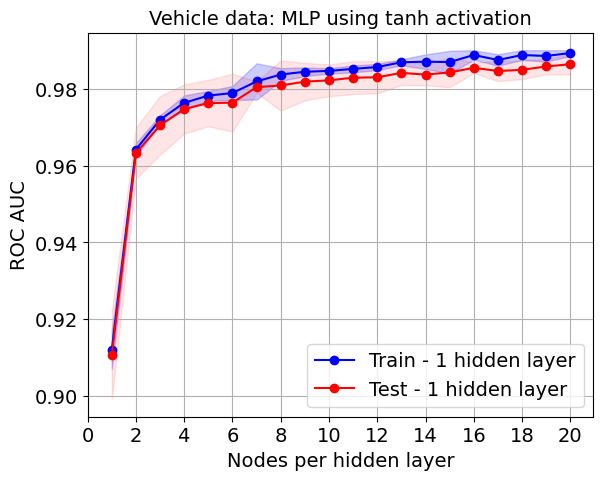

relu
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9859041436331404 at 20 nodes
Maximum accuracy score: 0.8925423603403626 at 18 nodes


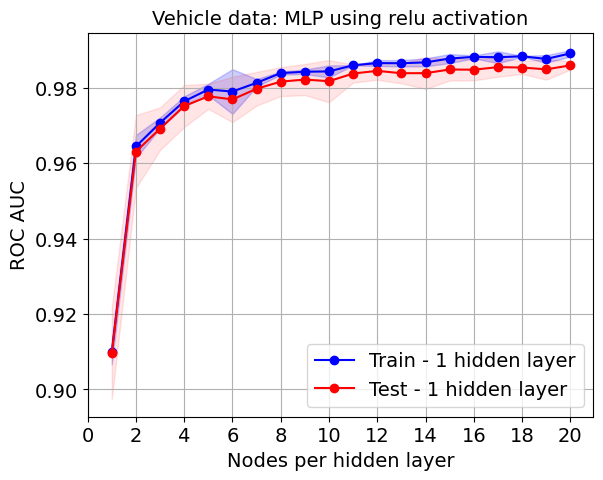

In [24]:
X_train = X_train_pca

activation_list = ['logistic', 'tanh', 'relu']

for activation in activation_list:
    
    print(activation)
    
    ########################
    ## 1 hidden layers
    ########################
    
    train_acc_m = []
    train_acc_std = []
    test_acc_m = []
    test_acc_std = []

    train_roc_m = []
    train_roc_std = []
    test_roc_m = []
    test_roc_std = []
    
    alpha = 0.0001 # default 0.0001
    max_iter = 4000 # default 200
    hidden_layers = 1
    print(f'MLP with {hidden_layers} hidden layers')
    
    nodes_list = list(range(1,21,1))
    
    for nodes in nodes_list:
        #print(f'{nodes} nodes')
        hidden_layer_sizes = tuple([nodes])*hidden_layers
        clf = MLPClassifier(solver='adam', alpha=alpha,
                            hidden_layer_sizes=hidden_layer_sizes, 
                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
        
        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                                n_jobs=16)
        
    #    for estimator in scores['estimator']:
    #        print(estimator.loss_)
        
        # train and test accuracy
        train_acc_m.append(np.mean(scores['train_accuracy']))
        train_acc_std.append(np.std(scores['train_accuracy']))
        test_acc_m.append(np.mean(scores['test_accuracy']))  
        test_acc_std.append(np.std(scores['test_accuracy']))
                            
        # train and test roc auc
        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
    
    train_acc_m_mlp1 = np.asarray(train_acc_m)
    train_acc_std_mlp1 = np.asarray(train_acc_std)
    test_acc_m_mlp1 = np.asarray(test_acc_m)
    test_acc_std_mlp1 = np.asarray(test_acc_std) 
    
    train_roc_m_mlp1 = np.asarray(train_roc_m)
    train_roc_std_mlp1 = np.asarray(train_roc_std)
    test_roc_m_mlp1 = np.asarray(test_roc_m)
    test_roc_std_mlp1 = np.asarray(test_roc_std)
    
    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
#    ########################
#    ## 2 hidden layers
#    ########################
#    
#    train_acc_m = []
#    train_acc_std = []
#    test_acc_m = []
#    test_acc_std = []
#    
#    train_roc_m = []
#    train_roc_std = []
#    test_roc_m = []
#    test_roc_std = []
#    
#    alpha = 0.0001 # default 0.0001
#    max_iter = 4000 # default 200
#    hidden_layers = 2
#    print(f'MLP with {hidden_layers} hidden layers')
#    
#    nodes_list = list(range(1,21,1))
#    
#    for nodes in nodes_list:
#    #    print(f'{nodes} nodes')
#        hidden_layer_sizes = tuple([nodes])*hidden_layers
#        clf = MLPClassifier(solver='adam', alpha=alpha,
#                            hidden_layer_sizes=hidden_layer_sizes, 
#                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
#        
#        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
#                                n_jobs=8)
#        
#    #    for estimator in scores['estimator']:
#    #        print(estimator.loss_)
#        
#        # train and test accuracy
#        train_acc_m.append(np.mean(scores['train_accuracy']))
#        train_acc_std.append(np.std(scores['train_accuracy']))
#        test_acc_m.append(np.mean(scores['test_accuracy']))  
#        test_acc_std.append(np.std(scores['test_accuracy']))
#                            
#        # train and test roc auc
#        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
#        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
#        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
#        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
#    
#    train_acc_m_mlp2 = np.asarray(train_acc_m)
#    train_acc_std_mlp2 = np.asarray(train_acc_std)
#    test_acc_m_mlp2 = np.asarray(test_acc_m)
#    test_acc_std_mlp2 = np.asarray(test_acc_std) 
#    
#    train_roc_m_mlp2 = np.asarray(train_roc_m)
#    train_roc_std_mlp2 = np.asarray(train_roc_std)
#    test_roc_m_mlp2 = np.asarray(test_roc_m)
#    test_roc_std_mlp2 = np.asarray(test_roc_std)
#    
#    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
#    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
#    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
    fontsize = 14

    # roc_auc
    fig = plt.figure()
    ax = fig.add_axes([0.15, 0.14, 0.79, 0.80])
    # Uniform weights
    ax.plot(nodes_list, train_roc_m_mlp1, 'o-', color='b', label='Train - 1 hidden layer')
    ax.fill_between(nodes_list, train_roc_m_mlp1 - 2*train_roc_std_mlp1, train_roc_m_mlp1 + 2*train_roc_std_mlp1, 
                    alpha=0.2, color="b")
    
    ax.plot(nodes_list, test_roc_m_mlp1, 'o-', color='r', label='Test - 1 hidden layer')
    ax.fill_between(nodes_list, test_roc_m_mlp1 - 2*test_roc_std_mlp1, test_roc_m_mlp1 + 2*test_roc_std_mlp1, 
                    alpha=0.1, color="r")
    
#    # Distance weights
#    ax.plot(nodes_list, train_roc_m_mlp2, 'o-', color='k', markerfacecolor='none', label='Train - 2 hidden layers')
#    ax.fill_between(nodes_list, train_roc_m_mlp2 - 2*train_roc_std_mlp2, train_roc_m_mlp2 + 2*train_roc_std_mlp2, 
#                    alpha=0.1, color="k")
#    
#    ax.plot(nodes_list, test_roc_m_mlp2, 'o-', color='g', markerfacecolor='none', label='Test - 2 hidden layers')
#    ax.fill_between(nodes_list, test_roc_m_mlp2 - 2*test_roc_std_mlp2, test_roc_m_mlp2 + 2*test_roc_std_mlp2, 
#                    alpha=0.2, color="g")
#    
    ax.legend(fontsize=fontsize, loc='lower right')
    ax.tick_params(labelsize=fontsize)
    ax.set_title(f'Vehicle data: MLP using {activation} activation', fontsize=fontsize) 
    ax.set_xlabel('Nodes per hidden layer', fontsize=fontsize) 
    ax.set_ylabel('ROC AUC', fontsize=fontsize) 
    #ax.set_ylim(0.68, 1.02)
    ax.set_xticks(list(range(0,22,2)))
    plt.grid(True)
    plt.show()
#    fig.savefig(f'mlp-roc_auc-nodes-{activation}.png')
    plt.close(fig)
    

In [101]:
X_train = X_train_pca

#activation_list = ['logistic', 'tanh', 'relu']
activation_list = ['relu']

for activation in activation_list:
    
    print(activation)
    
    ########################
    ## 1 hidden layers
    ########################
    
    train_acc_m = []
    train_acc_std = []
    test_acc_m = []
    test_acc_std = []

    train_roc_m = []
    train_roc_std = []
    test_roc_m = []
    test_roc_std = []
    
    alpha = 0.0001 # default 0.0001
    max_iter = 4000 # default 200
    hidden_layers = 1
    print(f'MLP with {hidden_layers} hidden layers')
    
    nodes_list = list(range(1,21,1))
    
    for nodes in nodes_list:
        #print(f'{nodes} nodes')
        hidden_layer_sizes = tuple([nodes])*hidden_layers
        clf = MLPClassifier(solver='adam', alpha=alpha,
                            hidden_layer_sizes=hidden_layer_sizes, 
                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
        
        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                                n_jobs=5)
        
    #    for estimator in scores['estimator']:
    #        print(estimator.loss_)
        
        # train and test accuracy
        train_acc_m.append(np.mean(scores['train_accuracy']))
        train_acc_std.append(np.std(scores['train_accuracy']))
        test_acc_m.append(np.mean(scores['test_accuracy']))  
        test_acc_std.append(np.std(scores['test_accuracy']))
                            
        # train and test roc auc
        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
    
    train_acc_m_mlp1 = np.asarray(train_acc_m)
    train_acc_std_mlp1 = np.asarray(train_acc_std)
    test_acc_m_mlp1 = np.asarray(test_acc_m)
    test_acc_std_mlp1 = np.asarray(test_acc_std) 
    
    train_roc_m_mlp1 = np.asarray(train_roc_m)
    train_roc_std_mlp1 = np.asarray(train_roc_std)
    test_roc_m_mlp1 = np.asarray(test_roc_m)
    test_roc_std_mlp1 = np.asarray(test_roc_std)
    
    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')

    train_roc_m_pca = train_roc_m_mlp1
    train_roc_std_pca = train_roc_std_mlp1
    
    test_roc_m_pca = test_roc_m_mlp1 
    test_roc_std_pca = test_roc_std_mlp1 
    

relu
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9859041436331404 at 20 nodes
Maximum accuracy score: 0.8925423603403626 at 18 nodes


In [153]:
X_train_pca.shape

(4504, 6)

In [28]:
# Learning curve with respect to training set size
# Validation set remains the same

X_train = X_train_pca
X_test = X_test_pca

# MLP learning curves
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=[12], 
                    activation='relu', random_state=seed, max_iter=4000, tol=1e-6)
train_sizes = np.arange(5,105,5)*0.01*X_train.shape[0]*0.80
train_sizes = train_sizes.astype(int)
train_sizes_mlp, train_scores_pca, validation_scores_pca = learning_curve(
estimator = clf,
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'roc_auc_ovr', shuffle = True, n_jobs=16, random_state=seed)

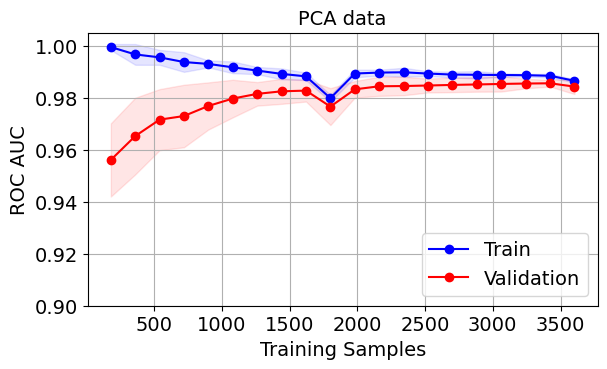

In [44]:
train_mean = train_scores_pca.mean(axis = 1)
train_std = train_scores_pca.std(axis = 1)
test_mean = validation_scores_pca.mean(axis = 1)
test_std = validation_scores_pca.std(axis = 1)

fontsize = 14
fig = plt.figure(figsize=(6,3.5))
ax = fig.add_axes([0.13, 0.15, 0.85, 0.78])
ax.plot(train_sizes_mlp, train_mean, '-o', label='Train', color="b")
ax.fill_between(train_sizes_mlp, train_mean - 2*train_std, train_mean + 2*train_std, 
                alpha=0.1, color="b")
ax.plot(train_sizes_mlp, test_mean, '-o', label='Validation', color="r")
ax.fill_between(train_sizes_mlp, test_mean - 2*test_std, test_mean + 2*test_std, 
                alpha=0.1, color="r")
ax.legend(fontsize=fontsize, loc="lower right")
ax.tick_params(labelsize=fontsize)
ax.set_title('PCA data', fontsize=fontsize) 
ax.set_xlabel('Training Samples', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize) 
#ax.set_xlim(0, 500)
ax.set_ylim(0.90, 1.005)
#ax.set_xticks(np.arange(0,600,100))
#ax.set_yticks(np.arange(0.60,1.05,0.05))
plt.grid(True)
plt.show()
fig.savefig('NN_PCA_learning_curves.png')
plt.close(fig)

In [145]:
X_train = X_train_pca
X_test = X_test_pca

# MLP
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=[12], 
                    activation='relu', random_state=seed, max_iter=4000, tol=1e-6)

tic = time.perf_counter()
clf.fit(X_train, y_train)
toc = time.perf_counter()
mlp_train_time = toc-tic
train_iter = clf.n_iter_
loss_curve_pca = clf.loss_curve_

tic = time.perf_counter()
y_pred_train_mlp = clf.predict(X_train)
toc = time.perf_counter()
mlp_pred_train_time = toc-tic

tic = time.perf_counter()
y_pred_test_mlp = clf.predict(X_test)
toc = time.perf_counter()
mlp_pred_test_time = toc-tic

train_acc_mlp = accuracy_score(y_train, y_pred_train_mlp)
test_acc_mlp = accuracy_score(y_test, y_pred_test_mlp)

train_roc_mlp = roc_auc_score(y_train, clf.predict_proba(X_train), average='macro', multi_class='ovr')
test_roc_mlp = roc_auc_score(y_test, clf.predict_proba(X_test), average='macro', multi_class='ovr')

print('\nMLP training and test')
print(f'Feature components: {X_train.shape[1]}')
print(f'train accuracy: {train_acc_mlp}') 
print(f'train roc_auc: {train_roc_mlp}')
print(f'test accuracy: {test_acc_mlp}')
print(f'test roc_auc: {test_roc_mlp}') 

print(f'\nIterations to train: {train_iter}')
print(f'Time to train: {mlp_train_time}')
#print(f'Time to predict training set: {mlp_pred_train_time}') 
#print(f'Time to predict test set: {mlp_pred_test_time}') 


MLP training and test
Feature components: 6
train accuracy: 0.9005328596802842
train roc_auc: 0.988903281169681
test accuracy: 0.891765924391507
test roc_auc: 0.9833210153831929

Iterations to train: 838
Time to train: 7.354960099910386


In [33]:
X_train.shape

(4504, 6)

In [18]:
#ORIGINAL DATA
#MLP training and test
#Feature components: 36
#train accuracy: 0.9320603907637656
#train roc_auc: 0.9920849665946561
#test accuracy: 0.8839979285344381
#test roc_auc: 0.9809906114154375
#
#Iterations to train: 906
#Time to train: 8.047170399993774

#PCA DATA
#MLP training and test
#Feature components: 6
#train accuracy: 0.9005328596802842
#train roc_auc: 0.988903281169681
#test accuracy: 0.891765924391507
#test roc_auc: 0.9833210153831929
#
#Iterations to train: 838
#Time to train: 6.940747900007409

### ICA

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


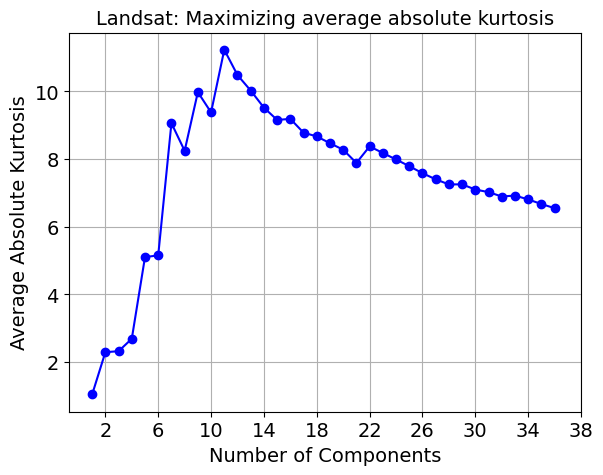

Maximum avg. kurtosis at number of components: 11


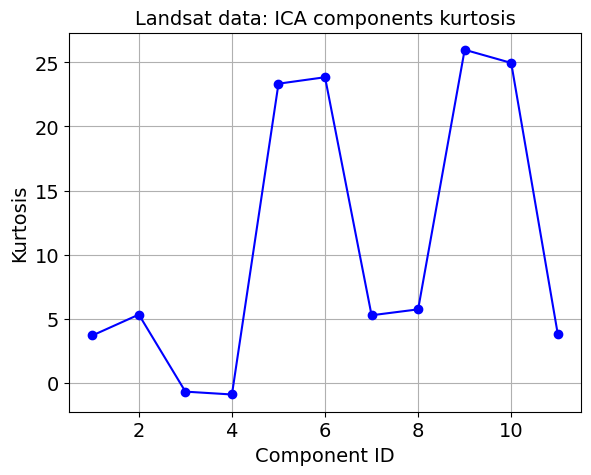

In [120]:
X_train = X_train_orig

# 2nd approach take mean of kurtosis
aver_kurt = []
for ica_components in range(1,X_train.shape[1]+1):
    kurtosis_scores = []
    ica = FastICA(n_components=ica_components, random_state=seed)
    tmp = ica.fit_transform(X_train)
    kurtosis_scores = [np.abs(kurtosis(tmp[:, i])) for i in range(ica_components)]
    aver_kurt.append(np.mean(kurtosis_scores))

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(range(1,X_train.shape[1]+1), aver_kurt,'-o', color='b')
ax.tick_params(labelsize=fontsize)
ax.set_title('Landsat: Maximizing average absolute kurtosis', fontsize=fontsize)
ax.set_xlabel('Number of Components', fontsize=fontsize) 
ax.set_ylabel('Average Absolute Kurtosis', fontsize=fontsize)
ax.set_xticks(range(2,40,4))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
#fig.savefig('rhc_effect_max_attempts.png')
plt.close(fig)

ica_components = np.argmax(aver_kurt)+1
print(f'Maximum avg. kurtosis at number of components: {ica_components}')

ica2 = FastICA(n_components=ica_components, random_state=seed)
X_train_ica2 = ica2.fit_transform(X_train)  

kurtosis_scores = [kurtosis(X_train_ica2[:, i]) for i in range(X_train_ica2.shape[1])]

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(range(1, ica_components+1), kurtosis_scores,'-o', color='b')
ax.tick_params(labelsize=fontsize)
ax.set_title('Landsat data: ICA components kurtosis', fontsize=fontsize)
ax.set_xlabel('Component ID', fontsize=fontsize) 
ax.set_ylabel('Kurtosis', fontsize=fontsize)
ax.set_xticks(range(2,X_train_ica2.shape[1]+1,2))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
#fig.savefig('rhc_effect_max_attempts.png')
plt.close(fig)


In [121]:
# Transform test set
X_test = X_test_orig
X_test_ica2 = X_test @ np.transpose(ica2.components_)

logistic
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9844695798557253 at 20 nodes
Maximum accuracy score: 0.8854391416944136 at 18 nodes


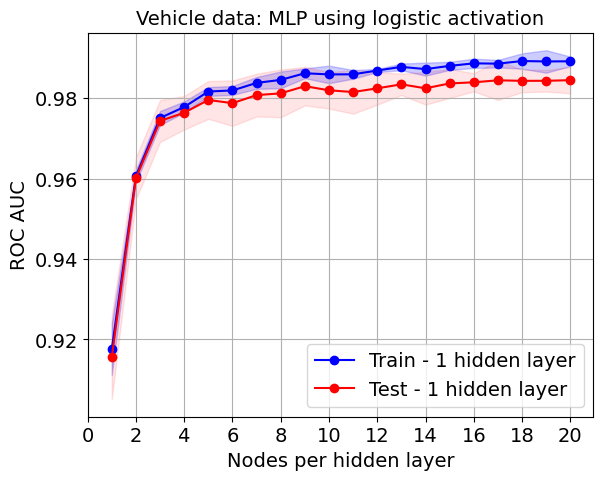

tanh
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9849640001247735 at 17 nodes
Maximum accuracy score: 0.8874349488222963 at 14 nodes


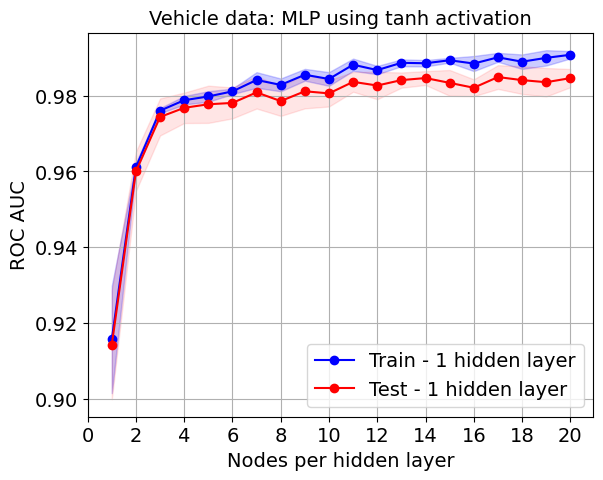

relu
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9853867091805164 at 17 nodes
Maximum accuracy score: 0.8907643359230486 at 18 nodes


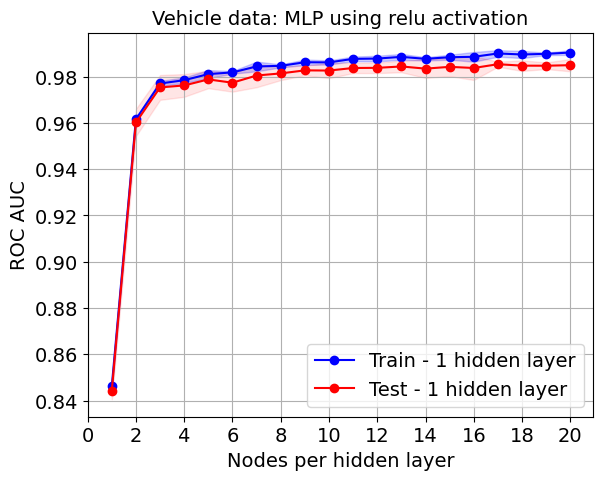

In [125]:
X_train = X_train_ica2

activation_list = ['logistic', 'tanh', 'relu']

for activation in activation_list:
    
    print(activation)
    
    ########################
    ## 1 hidden layers
    ########################
    
    train_acc_m = []
    train_acc_std = []
    test_acc_m = []
    test_acc_std = []

    train_roc_m = []
    train_roc_std = []
    test_roc_m = []
    test_roc_std = []
    
    alpha = 0.0001 # default 0.0001
    max_iter = 4000 # default 200
    hidden_layers = 1
    print(f'MLP with {hidden_layers} hidden layers')
    
    nodes_list = list(range(1,21,1))
    
    for nodes in nodes_list:
        #print(f'{nodes} nodes')
        hidden_layer_sizes = tuple([nodes])*hidden_layers
        clf = MLPClassifier(solver='adam', alpha=alpha,
                            hidden_layer_sizes=hidden_layer_sizes, 
                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
        
        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                                n_jobs=5)
        
    #    for estimator in scores['estimator']:
    #        print(estimator.loss_)
        
        # train and test accuracy
        train_acc_m.append(np.mean(scores['train_accuracy']))
        train_acc_std.append(np.std(scores['train_accuracy']))
        test_acc_m.append(np.mean(scores['test_accuracy']))  
        test_acc_std.append(np.std(scores['test_accuracy']))
                            
        # train and test roc auc
        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
    
    train_acc_m_mlp1 = np.asarray(train_acc_m)
    train_acc_std_mlp1 = np.asarray(train_acc_std)
    test_acc_m_mlp1 = np.asarray(test_acc_m)
    test_acc_std_mlp1 = np.asarray(test_acc_std) 
    
    train_roc_m_mlp1 = np.asarray(train_roc_m)
    train_roc_std_mlp1 = np.asarray(train_roc_std)
    test_roc_m_mlp1 = np.asarray(test_roc_m)
    test_roc_std_mlp1 = np.asarray(test_roc_std)
    
    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
#    ########################
#    ## 2 hidden layers
#    ########################
#    
#    train_acc_m = []
#    train_acc_std = []
#    test_acc_m = []
#    test_acc_std = []
#    
#    train_roc_m = []
#    train_roc_std = []
#    test_roc_m = []
#    test_roc_std = []
#    
#    alpha = 0.0001 # default 0.0001
#    max_iter = 4000 # default 200
#    hidden_layers = 2
#    print(f'MLP with {hidden_layers} hidden layers')
#    
#    nodes_list = list(range(1,21,1))
#    
#    for nodes in nodes_list:
#    #    print(f'{nodes} nodes')
#        hidden_layer_sizes = tuple([nodes])*hidden_layers
#        clf = MLPClassifier(solver='adam', alpha=alpha,
#                            hidden_layer_sizes=hidden_layer_sizes, 
#                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
#        
#        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
#                                n_jobs=8)
#        
#    #    for estimator in scores['estimator']:
#    #        print(estimator.loss_)
#        
#        # train and test accuracy
#        train_acc_m.append(np.mean(scores['train_accuracy']))
#        train_acc_std.append(np.std(scores['train_accuracy']))
#        test_acc_m.append(np.mean(scores['test_accuracy']))  
#        test_acc_std.append(np.std(scores['test_accuracy']))
#                            
#        # train and test roc auc
#        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
#        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
#        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
#        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
#    
#    train_acc_m_mlp2 = np.asarray(train_acc_m)
#    train_acc_std_mlp2 = np.asarray(train_acc_std)
#    test_acc_m_mlp2 = np.asarray(test_acc_m)
#    test_acc_std_mlp2 = np.asarray(test_acc_std) 
#    
#    train_roc_m_mlp2 = np.asarray(train_roc_m)
#    train_roc_std_mlp2 = np.asarray(train_roc_std)
#    test_roc_m_mlp2 = np.asarray(test_roc_m)
#    test_roc_std_mlp2 = np.asarray(test_roc_std)
#    
#    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
#    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
#    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
    fontsize = 14

    # roc_auc
    fig = plt.figure()
    ax = fig.add_axes([0.15, 0.14, 0.79, 0.80])
    # Uniform weights
    ax.plot(nodes_list, train_roc_m_mlp1, 'o-', color='b', label='Train - 1 hidden layer')
    ax.fill_between(nodes_list, train_roc_m_mlp1 - 2*train_roc_std_mlp1, train_roc_m_mlp1 + 2*train_roc_std_mlp1, 
                    alpha=0.2, color="b")
    
    ax.plot(nodes_list, test_roc_m_mlp1, 'o-', color='r', label='Test - 1 hidden layer')
    ax.fill_between(nodes_list, test_roc_m_mlp1 - 2*test_roc_std_mlp1, test_roc_m_mlp1 + 2*test_roc_std_mlp1, 
                    alpha=0.1, color="r")
    
#    # Distance weights
#    ax.plot(nodes_list, train_roc_m_mlp2, 'o-', color='k', markerfacecolor='none', label='Train - 2 hidden layers')
#    ax.fill_between(nodes_list, train_roc_m_mlp2 - 2*train_roc_std_mlp2, train_roc_m_mlp2 + 2*train_roc_std_mlp2, 
#                    alpha=0.1, color="k")
#    
#    ax.plot(nodes_list, test_roc_m_mlp2, 'o-', color='g', markerfacecolor='none', label='Test - 2 hidden layers')
#    ax.fill_between(nodes_list, test_roc_m_mlp2 - 2*test_roc_std_mlp2, test_roc_m_mlp2 + 2*test_roc_std_mlp2, 
#                    alpha=0.2, color="g")
#    
    ax.legend(fontsize=fontsize, loc='lower right')
    ax.tick_params(labelsize=fontsize)
    ax.set_title(f'Vehicle data: MLP using {activation} activation', fontsize=fontsize) 
    ax.set_xlabel('Nodes per hidden layer', fontsize=fontsize) 
    ax.set_ylabel('ROC AUC', fontsize=fontsize) 
    #ax.set_ylim(0.68, 1.02)
    ax.set_xticks(list(range(0,22,2)))
    plt.grid(True)
    plt.show()
#    fig.savefig(f'mlp-roc_auc-nodes-{activation}.png')
    plt.close(fig)
    

In [123]:
X_train = X_train_ica2

#activation_list = ['logistic', 'tanh', 'relu']
activation_list = ['relu']

for activation in activation_list:
    
    print(activation)
    
    ########################
    ## 1 hidden layers
    ########################
    
    train_acc_m = []
    train_acc_std = []
    test_acc_m = []
    test_acc_std = []

    train_roc_m = []
    train_roc_std = []
    test_roc_m = []
    test_roc_std = []
    
    alpha = 0.0001 # default 0.0001
    max_iter = 4000 # default 200
    hidden_layers = 1
    print(f'MLP with {hidden_layers} hidden layers')
    
    nodes_list = list(range(1,21,1))
    
    for nodes in nodes_list:
        #print(f'{nodes} nodes')
        hidden_layer_sizes = tuple([nodes])*hidden_layers
        clf = MLPClassifier(solver='adam', alpha=alpha,
                            hidden_layer_sizes=hidden_layer_sizes, 
                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
        
        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                                n_jobs=5)
        
    #    for estimator in scores['estimator']:
    #        print(estimator.loss_)
        
        # train and test accuracy
        train_acc_m.append(np.mean(scores['train_accuracy']))
        train_acc_std.append(np.std(scores['train_accuracy']))
        test_acc_m.append(np.mean(scores['test_accuracy']))  
        test_acc_std.append(np.std(scores['test_accuracy']))
                            
        # train and test roc auc
        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
    
    train_acc_m_mlp1 = np.asarray(train_acc_m)
    train_acc_std_mlp1 = np.asarray(train_acc_std)
    test_acc_m_mlp1 = np.asarray(test_acc_m)
    test_acc_std_mlp1 = np.asarray(test_acc_std) 
    
    train_roc_m_mlp1 = np.asarray(train_roc_m)
    train_roc_std_mlp1 = np.asarray(train_roc_std)
    test_roc_m_mlp1 = np.asarray(test_roc_m)
    test_roc_std_mlp1 = np.asarray(test_roc_std)
    
    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')

    train_roc_m_ica = train_roc_m_mlp1
    train_roc_std_ica = train_roc_std_mlp1
    
    test_roc_m_ica = test_roc_m_mlp1 
    test_roc_std_ica = test_roc_std_mlp1 
    

relu
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9853867091805164 at 17 nodes
Maximum accuracy score: 0.8907643359230486 at 18 nodes


In [124]:
test_roc_m_ica 

array([0.8443262 , 0.96020105, 0.97534653, 0.97621196, 0.97881256,
       0.97738724, 0.98049781, 0.98140982, 0.98272496, 0.98264461,
       0.9837491 , 0.98381468, 0.98441317, 0.9834731 , 0.98424481,
       0.98375178, 0.98538671, 0.98476238, 0.98472798, 0.98496937])

In [35]:
# Learning curve with respect to training set size
# Validation set remains the same

X_train = X_train_ica2
X_test = X_test_ica2

# MLP learning curves
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=[12], 
                    activation='relu', random_state=seed, max_iter=4000, tol=1e-6)
train_sizes = np.arange(5,105,5)*0.01*X_train.shape[0]*0.80
train_sizes = train_sizes.astype(int)
train_sizes_mlp, train_scores_ica, validation_scores_ica = learning_curve(
estimator = clf,
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'roc_auc_ovr', shuffle = True, n_jobs=16, random_state=seed)

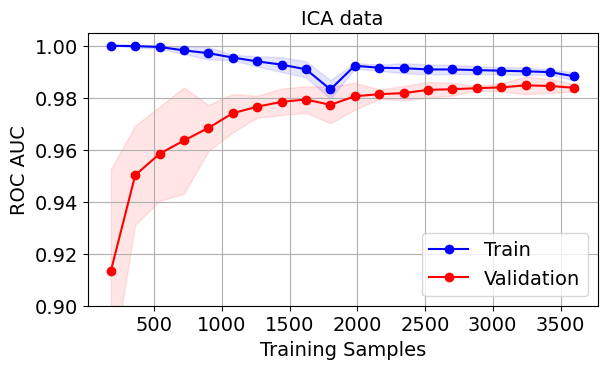

In [45]:
train_mean = train_scores_ica.mean(axis = 1)
train_std = train_scores_ica.std(axis = 1)
test_mean = validation_scores_ica.mean(axis = 1)
test_std = validation_scores_ica.std(axis = 1)

fontsize = 14
fig = plt.figure(figsize=(6,3.5))
ax = fig.add_axes([0.13, 0.15, 0.85, 0.78])
ax.plot(train_sizes_mlp, train_mean, '-o', label='Train', color="b")
ax.fill_between(train_sizes_mlp, train_mean - 2*train_std, train_mean + 2*train_std, 
                alpha=0.1, color="b")
ax.plot(train_sizes_mlp, test_mean, '-o', label='Validation', color="r")
ax.fill_between(train_sizes_mlp, test_mean - 2*test_std, test_mean + 2*test_std, 
                alpha=0.1, color="r")
ax.legend(fontsize=fontsize, loc="lower right")
ax.tick_params(labelsize=fontsize)
ax.set_title('ICA data', fontsize=fontsize) 
ax.set_xlabel('Training Samples', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize) 
#ax.set_xlim(0, 500)
ax.set_ylim(0.90, 1.005)
#ax.set_xticks(np.arange(0,600,100))
#ax.set_yticks(np.arange(0.60,1.05,0.05))
plt.grid(True)
plt.show()
fig.savefig('NN_ICA_learning_curves.png')
plt.close(fig)

In [147]:
X_train = X_train_ica2
X_test = X_test_ica2

# MLP
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=[12], 
                    activation='relu', random_state=seed, max_iter=4000, tol=1e-6)

tic = time.perf_counter()
clf.fit(X_train, y_train)
toc = time.perf_counter()
mlp_train_time = toc-tic
train_iter = clf.n_iter_
loss_curve_ica = clf.loss_curve_

tic = time.perf_counter()
y_pred_train_mlp = clf.predict(X_train)
toc = time.perf_counter()
mlp_pred_train_time = toc-tic

tic = time.perf_counter()
y_pred_test_mlp = clf.predict(X_test)
toc = time.perf_counter()
mlp_pred_test_time = toc-tic

train_acc_mlp = accuracy_score(y_train, y_pred_train_mlp)
test_acc_mlp = accuracy_score(y_test, y_pred_test_mlp)

train_roc_mlp = roc_auc_score(y_train, clf.predict_proba(X_train), average='macro', multi_class='ovr')
test_roc_mlp = roc_auc_score(y_test, clf.predict_proba(X_test), average='macro', multi_class='ovr')

print('\nMLP training and test')
print(f'Feature components: {X_train.shape[1]}')
print(f'train accuracy: {train_acc_mlp}') 
print(f'train roc_auc: {train_roc_mlp}')
print(f'test accuracy: {test_acc_mlp}')
print(f'test roc_auc: {test_roc_mlp}') 

print(f'\nIterations to train: {train_iter}')
print(f'Time to train: {mlp_train_time}')
#print(f'Time to predict training set: {mlp_pred_train_time}') 
#print(f'Time to predict test set: {mlp_pred_test_time}') 


MLP training and test
Feature components: 11
train accuracy: 0.908303730017762
train roc_auc: 0.9887272793200945
test accuracy: 0.889694458829622
test roc_auc: 0.9826567898899335

Iterations to train: 655
Time to train: 5.802341399947181


In [ ]:
#ORIGINAL DATA
#MLP training and test
#train accuracy: 0.9320603907637656
#train roc_auc: 0.9920849665946561
#test accuracy: 0.8839979285344381
#test roc_auc: 0.9809906114154375
#Time to train: 8.140184999996563
#Time to predict training set: 0.0022104999952716753
#Time to predict test set: 0.0011292999988654628

#PCA DATA
#MLP training and test
#train accuracy: 0.9005328596802842
#train roc_auc: 0.988903281169681
#test accuracy: 0.891765924391507
#test roc_auc: 0.9833210153831929
#Time to train: 6.964195799999288
#Time to predict training set: 0.001590800005942583
#Time to predict test set: 0.00085120000585448

#ICA DATA
#MLP training and test
#train accuracy: 0.908303730017762
#train roc_auc: 0.9887272793200945
#test accuracy: 0.889694458829622
#test roc_auc: 0.9826567898899335
#Time to train: 5.703620600004797
#Time to predict training set: 0.0016730000061215833
#Time to predict test set: 0.0009006999898701906

### RCA

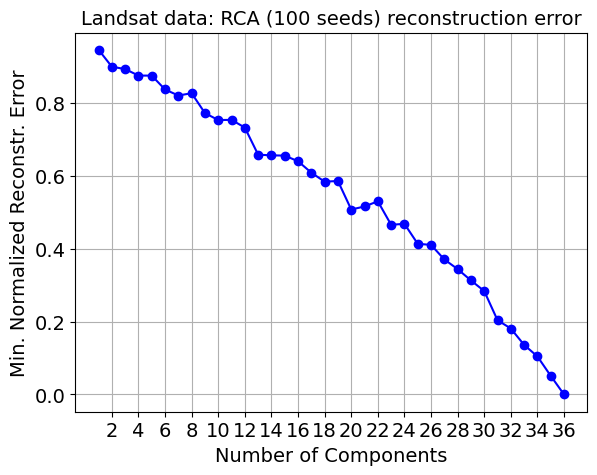

In [38]:
X_train = X_train_orig

max_dims = X_train.shape[1]
df = pd.DataFrame(columns = ['dims', 'seed', 'error'])

for dims, i in product(range(1, max_dims+1), range(100)):

    rp = SparseRandomProjection(random_state=i, n_components=dims, compute_inverse_components = True)
#    rp = GaussianRandomProjection(random_state=i, n_components=dims, compute_inverse_components = True)
    rp.fit(X_train)
    X_train_rf = rp.transform(X_train)
    X_train_rec = X_train_rf @ np.transpose(rp.inverse_components_)
    norm_error = np.linalg.norm(X_train - X_train_rec)/np.linalg.norm(X_train)
    df.loc[len(df.index)] = [dims, i, norm_error]

min_error_per_dim = df.groupby(['dims'])['error'].min()

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(range(1, max_dims+1), min_error_per_dim.values,'-o', color='b')

ax.tick_params(labelsize=fontsize)
ax.set_title('Landsat data: RCA (100 seeds) reconstruction error', fontsize=fontsize)
ax.set_xlabel('Number of Components', fontsize=fontsize) 
ax.set_ylabel('Min. Normalized Reconstr. Error', fontsize=fontsize)
ax.set_xticks(range(2,38,2))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
#fig.savefig('rhc_effect_max_attempts.png')
plt.close(fig)

In [39]:
selected_dim = 31
X_train = X_train_orig
X_test = X_test_orig

best_seed = int(df[df['dims']==selected_dim].sort_values('error')['seed'].iloc[0])

rp = SparseRandomProjection(random_state=best_seed, n_components=selected_dim, compute_inverse_components = True)
#    rp = GaussianRandomProjection(random_state=i, n_components=dims, compute_inverse_components = True)
rp.fit(X_train)
X_train_rp = rp.transform(X_train)

# Transform test set 
X_test_rp = X_test @ np.transpose(rp.components_)

logistic
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.983938396501087 at 15 nodes
Maximum accuracy score: 0.8912092736465655 at 19 nodes


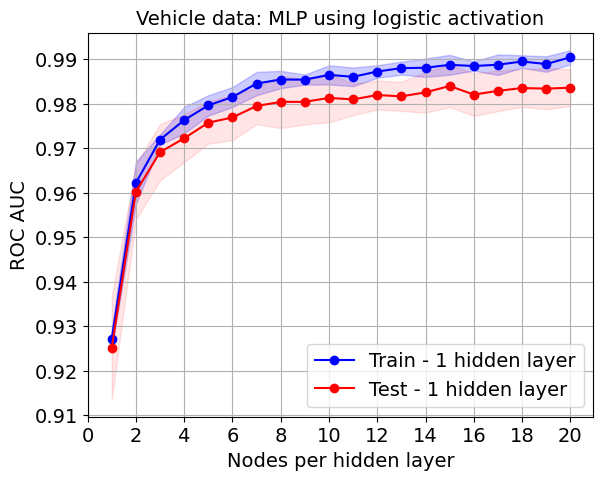

tanh
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9843793461945445 at 19 nodes
Maximum accuracy score: 0.8889865581452707 at 20 nodes


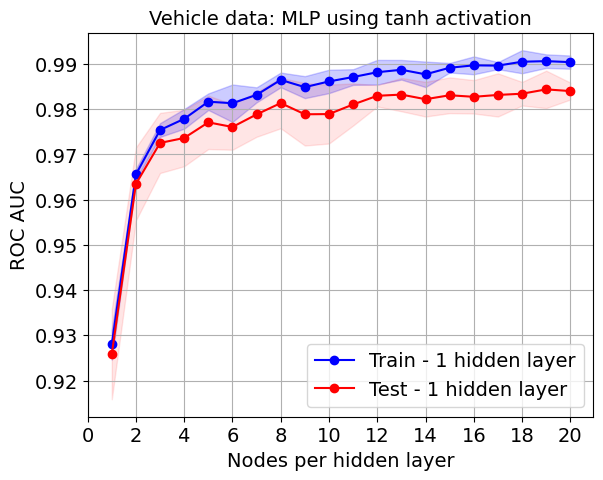

relu
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9843270726091944 at 18 nodes
Maximum accuracy score: 0.8863226045135036 at 19 nodes


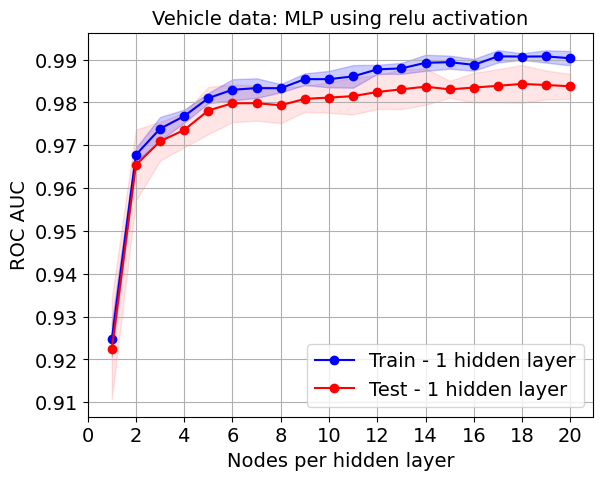

In [126]:
X_train = X_train_rp

activation_list = ['logistic', 'tanh', 'relu']

for activation in activation_list:
    
    print(activation)
    
    ########################
    ## 1 hidden layers
    ########################
    
    train_acc_m = []
    train_acc_std = []
    test_acc_m = []
    test_acc_std = []

    train_roc_m = []
    train_roc_std = []
    test_roc_m = []
    test_roc_std = []
    
    alpha = 0.0001 # default 0.0001
    max_iter = 4000 # default 200
    hidden_layers = 1
    print(f'MLP with {hidden_layers} hidden layers')
    
    nodes_list = list(range(1,21,1))
    
    for nodes in nodes_list:
        #print(f'{nodes} nodes')
        hidden_layer_sizes = tuple([nodes])*hidden_layers
        clf = MLPClassifier(solver='adam', alpha=alpha,
                            hidden_layer_sizes=hidden_layer_sizes, 
                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
        
        scores = cross_validate(clf, X_train_rp, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                                n_jobs=16)
        
    #    for estimator in scores['estimator']:
    #        print(estimator.loss_)
        
        # train and test accuracy
        train_acc_m.append(np.mean(scores['train_accuracy']))
        train_acc_std.append(np.std(scores['train_accuracy']))
        test_acc_m.append(np.mean(scores['test_accuracy']))  
        test_acc_std.append(np.std(scores['test_accuracy']))
                            
        # train and test roc auc
        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
    
    train_acc_m_mlp1 = np.asarray(train_acc_m)
    train_acc_std_mlp1 = np.asarray(train_acc_std)
    test_acc_m_mlp1 = np.asarray(test_acc_m)
    test_acc_std_mlp1 = np.asarray(test_acc_std) 
    
    train_roc_m_mlp1 = np.asarray(train_roc_m)
    train_roc_std_mlp1 = np.asarray(train_roc_std)
    test_roc_m_mlp1 = np.asarray(test_roc_m)
    test_roc_std_mlp1 = np.asarray(test_roc_std)
    
    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
#    ########################
#    ## 2 hidden layers
#    ########################
#    
#    train_acc_m = []
#    train_acc_std = []
#    test_acc_m = []
#    test_acc_std = []
#    
#    train_roc_m = []
#    train_roc_std = []
#    test_roc_m = []
#    test_roc_std = []
#    
#    alpha = 0.0001 # default 0.0001
#    max_iter = 4000 # default 200
#    hidden_layers = 2
#    print(f'MLP with {hidden_layers} hidden layers')
#    
#    nodes_list = list(range(1,21,1))
#    
#    for nodes in nodes_list:
#    #    print(f'{nodes} nodes')
#        hidden_layer_sizes = tuple([nodes])*hidden_layers
#        clf = MLPClassifier(solver='adam', alpha=alpha,
#                            hidden_layer_sizes=hidden_layer_sizes, 
#                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
#        
#        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
#                                n_jobs=8)
#        
#    #    for estimator in scores['estimator']:
#    #        print(estimator.loss_)
#        
#        # train and test accuracy
#        train_acc_m.append(np.mean(scores['train_accuracy']))
#        train_acc_std.append(np.std(scores['train_accuracy']))
#        test_acc_m.append(np.mean(scores['test_accuracy']))  
#        test_acc_std.append(np.std(scores['test_accuracy']))
#                            
#        # train and test roc auc
#        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
#        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
#        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
#        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
#    
#    train_acc_m_mlp2 = np.asarray(train_acc_m)
#    train_acc_std_mlp2 = np.asarray(train_acc_std)
#    test_acc_m_mlp2 = np.asarray(test_acc_m)
#    test_acc_std_mlp2 = np.asarray(test_acc_std) 
#    
#    train_roc_m_mlp2 = np.asarray(train_roc_m)
#    train_roc_std_mlp2 = np.asarray(train_roc_std)
#    test_roc_m_mlp2 = np.asarray(test_roc_m)
#    test_roc_std_mlp2 = np.asarray(test_roc_std)
#    
#    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
#    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
#    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
    fontsize = 14

    # roc_auc
    fig = plt.figure()
    ax = fig.add_axes([0.15, 0.14, 0.79, 0.80])
    # Uniform weights
    ax.plot(nodes_list, train_roc_m_mlp1, 'o-', color='b', label='Train - 1 hidden layer')
    ax.fill_between(nodes_list, train_roc_m_mlp1 - 2*train_roc_std_mlp1, train_roc_m_mlp1 + 2*train_roc_std_mlp1, 
                    alpha=0.2, color="b")
    
    ax.plot(nodes_list, test_roc_m_mlp1, 'o-', color='r', label='Test - 1 hidden layer')
    ax.fill_between(nodes_list, test_roc_m_mlp1 - 2*test_roc_std_mlp1, test_roc_m_mlp1 + 2*test_roc_std_mlp1, 
                    alpha=0.1, color="r")
    
#    # Distance weights
#    ax.plot(nodes_list, train_roc_m_mlp2, 'o-', color='k', markerfacecolor='none', label='Train - 2 hidden layers')
#    ax.fill_between(nodes_list, train_roc_m_mlp2 - 2*train_roc_std_mlp2, train_roc_m_mlp2 + 2*train_roc_std_mlp2, 
#                    alpha=0.1, color="k")
#    
#    ax.plot(nodes_list, test_roc_m_mlp2, 'o-', color='g', markerfacecolor='none', label='Test - 2 hidden layers')
#    ax.fill_between(nodes_list, test_roc_m_mlp2 - 2*test_roc_std_mlp2, test_roc_m_mlp2 + 2*test_roc_std_mlp2, 
#                    alpha=0.2, color="g")
#    
    ax.legend(fontsize=fontsize, loc='lower right')
    ax.tick_params(labelsize=fontsize)
    ax.set_title(f'Vehicle data: MLP using {activation} activation', fontsize=fontsize) 
    ax.set_xlabel('Nodes per hidden layer', fontsize=fontsize) 
    ax.set_ylabel('ROC AUC', fontsize=fontsize) 
    #ax.set_ylim(0.68, 1.02)
    ax.set_xticks(list(range(0,22,2)))
    plt.grid(True)
    plt.show()
#    fig.savefig(f'mlp-roc_auc-nodes-{activation}.png')
    plt.close(fig)
    

In [103]:
X_train = X_train_rp

#activation_list = ['logistic', 'tanh', 'relu']
activation_list = ['relu']

for activation in activation_list:
    
    print(activation)
    
    ########################
    ## 1 hidden layers
    ########################
    
    train_acc_m = []
    train_acc_std = []
    test_acc_m = []
    test_acc_std = []

    train_roc_m = []
    train_roc_std = []
    test_roc_m = []
    test_roc_std = []
    
    alpha = 0.0001 # default 0.0001
    max_iter = 4000 # default 200
    hidden_layers = 1
    print(f'MLP with {hidden_layers} hidden layers')
    
    nodes_list = list(range(1,21,1))
    
    for nodes in nodes_list:
        #print(f'{nodes} nodes')
        hidden_layer_sizes = tuple([nodes])*hidden_layers
        clf = MLPClassifier(solver='adam', alpha=alpha,
                            hidden_layer_sizes=hidden_layer_sizes, 
                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
        
        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                                n_jobs=5)
        
    #    for estimator in scores['estimator']:
    #        print(estimator.loss_)
        
        # train and test accuracy
        train_acc_m.append(np.mean(scores['train_accuracy']))
        train_acc_std.append(np.std(scores['train_accuracy']))
        test_acc_m.append(np.mean(scores['test_accuracy']))  
        test_acc_std.append(np.std(scores['test_accuracy']))
                            
        # train and test roc auc
        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
    
    train_acc_m_mlp1 = np.asarray(train_acc_m)
    train_acc_std_mlp1 = np.asarray(train_acc_std)
    test_acc_m_mlp1 = np.asarray(test_acc_m)
    test_acc_std_mlp1 = np.asarray(test_acc_std) 
    
    train_roc_m_mlp1 = np.asarray(train_roc_m)
    train_roc_std_mlp1 = np.asarray(train_roc_std)
    test_roc_m_mlp1 = np.asarray(test_roc_m)
    test_roc_std_mlp1 = np.asarray(test_roc_std)
    
    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')

    train_roc_m_rp = train_roc_m_mlp1
    train_roc_std_rp = train_roc_std_mlp1
    
    test_roc_m_rp = test_roc_m_mlp1 
    test_roc_std_rp = test_roc_std_mlp1 
    

relu
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9843270726091944 at 18 nodes
Maximum accuracy score: 0.8863226045135036 at 19 nodes


In [40]:
# Learning curve with respect to training set size
# Validation set remains the same

X_train = X_train_rp
X_test = X_test_rp

# MLP learning curves
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=[12], 
                    activation='relu', random_state=seed, max_iter=4000, tol=1e-6)
train_sizes = np.arange(5,105,5)*0.01*X_train.shape[0]*0.80
train_sizes = train_sizes.astype(int)
train_sizes_mlp, train_scores_rp, validation_scores_rp = learning_curve(
estimator = clf,
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'roc_auc_ovr', shuffle = True, n_jobs=16, random_state=seed)

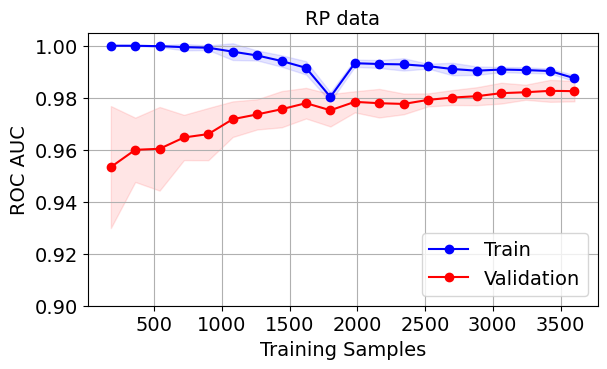

In [46]:
train_mean = train_scores_rp.mean(axis = 1)
train_std =  train_scores_rp.std(axis = 1)
test_mean = validation_scores_rp.mean(axis = 1)
test_std =  validation_scores_rp.std(axis = 1)

fontsize = 14
fig = plt.figure(figsize=(6,3.5))
ax = fig.add_axes([0.13, 0.15, 0.85, 0.78])
ax.plot(train_sizes_mlp, train_mean, '-o', label='Train', color="b")
ax.fill_between(train_sizes_mlp, train_mean - 2*train_std, train_mean + 2*train_std, 
                alpha=0.1, color="b")
ax.plot(train_sizes_mlp, test_mean, '-o', label='Validation', color="r")
ax.fill_between(train_sizes_mlp, test_mean - 2*test_std, test_mean + 2*test_std, 
                alpha=0.1, color="r")
ax.legend(fontsize=fontsize, loc="lower right")
ax.tick_params(labelsize=fontsize)
ax.set_title('RP data', fontsize=fontsize) 
ax.set_xlabel('Training Samples', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize) 
#ax.set_xlim(0, 500)
ax.set_ylim(0.90, 1.005)
#ax.set_xticks(np.arange(0,600,100))
#ax.set_yticks(np.arange(0.60,1.05,0.05))
plt.grid(True)
plt.show()
fig.savefig('NN_RP_learning_curves.png')
plt.close(fig)

In [149]:
X_train = X_train_rp
X_test = X_test_rp

# MLP
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=[12], 
                    activation='relu', random_state=seed, max_iter=4000, tol=1e-6)

tic = time.perf_counter()
clf.fit(X_train, y_train)
toc = time.perf_counter()
mlp_train_time = toc-tic
train_iter = clf.n_iter_
loss_curve_rp = clf.loss_curve_

tic = time.perf_counter()
y_pred_train_mlp = clf.predict(X_train)
toc = time.perf_counter()
mlp_pred_train_time = toc-tic

tic = time.perf_counter()
y_pred_test_mlp = clf.predict(X_test)
toc = time.perf_counter()
mlp_pred_test_time = toc-tic

train_acc_mlp = accuracy_score(y_train, y_pred_train_mlp)
test_acc_mlp = accuracy_score(y_test, y_pred_test_mlp)

train_roc_mlp = roc_auc_score(y_train, clf.predict_proba(X_train), average='macro', multi_class='ovr')
test_roc_mlp = roc_auc_score(y_test, clf.predict_proba(X_test), average='macro', multi_class='ovr')

print('\nMLP training and test')
print(f'Feature components: {X_train.shape[1]}')
print(f'train accuracy: {train_acc_mlp}') 
print(f'train roc_auc: {train_roc_mlp}')
print(f'test accuracy: {test_acc_mlp}')
print(f'test roc_auc: {test_roc_mlp}') 

print(f'\nIterations to train: {train_iter}')
print(f'Time to train: {mlp_train_time}')
#print(f'Time to predict training set: {mlp_pred_train_time}') 
#print(f'Time to predict test set: {mlp_pred_test_time}') 


MLP training and test
Feature components: 31
train accuracy: 0.9191829484902309
train roc_auc: 0.9902271541971358
test accuracy: 0.8819264629725531
test roc_auc: 0.9815271314838653

Iterations to train: 712
Time to train: 6.757655299967155


In [ ]:
#ORIGINAL DATA
#MLP training and test
#Feature components: 36
#train accuracy: 0.9320603907637656
#train roc_auc: 0.9920849665946561
#test accuracy: 0.8839979285344381
#test roc_auc: 0.9809906114154375
#
#Iterations to train: 906
#Time to train: 8.047170399993774

#PCA DATA
#MLP training and test
#Feature components: 6
#train accuracy: 0.9005328596802842
#train roc_auc: 0.988903281169681
#test accuracy: 0.891765924391507
#test roc_auc: 0.9833210153831929
#
#Iterations to train: 838
#Time to train: 6.940747900007409mayb

#ICA DATA
#MLP training and test
#Feature components: 11
#train accuracy: 0.908303730017762
#train roc_auc: 0.9887272793200945
#test accuracy: 0.889694458829622
#test roc_auc: 0.9826567898899335
#
#Iterations to train: 655
#Time to train: 5.6619837999896845

# RCA DATA  
#MLP training and test
#Feature components: 31
#train accuracy: 0.9191829484902309
#train roc_auc: 0.9902271541971358
#test accuracy: 0.8819264629725531
#test roc_auc: 0.9815271314838653
#
#Iterations to train: 712
#Time to train: 6.604927299995325

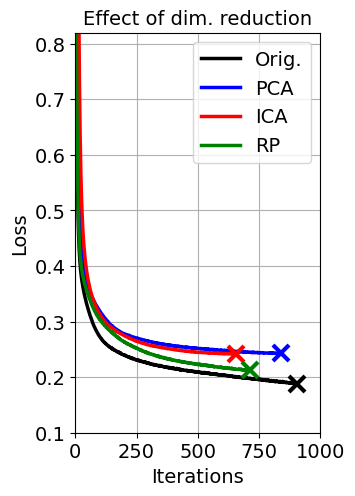

In [91]:
# Comparison of iterative learning curves

fontsize = 14
fig = plt.figure(figsize=(3.5,5))

ax = fig.add_axes([0.24, 0.14, 0.7, 0.80])
ax.plot(range(len(loss_curve_orig)), loss_curve_orig, color='black', label='Orig.', linewidth = 2.5)
ax.plot(range(len(loss_curve_pca)), loss_curve_pca, color='blue', label='PCA', linewidth = 2.5)
ax.plot(range(len(loss_curve_ica)), loss_curve_ica, color='red', label='ICA', linewidth = 2.5)
ax.plot(range(len(loss_curve_rp)), loss_curve_rp, color='green', label='RP', linewidth = 2.5)

ax.plot(len(loss_curve_orig), loss_curve_orig[-1], 'x', color='black', markersize=12, markeredgewidth=3)
ax.plot(len(loss_curve_pca), loss_curve_pca[-1], 'x',   color='blue', markersize=12, markeredgewidth=3)
ax.plot(len(loss_curve_ica), loss_curve_ica[-1], 'x',  color='red', markersize=12, markeredgewidth=3)
ax.plot(len(loss_curve_rp), loss_curve_rp[-1], 'x', color='green', markersize=12, markeredgewidth=3)




ax.tick_params(labelsize=fontsize)
ax.set_title('Effect of dim. reduction', fontsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Loss', fontsize=fontsize)
#ax.set_xticks([1]+list(range(6,42,6)))
#ax.set_yticks(np.arange(0.2,1.1,0.1))
ax.set_xlim((0,1000))
ax.set_ylim((0.1,0.82))
ax.legend(fontsize=fontsize, loc="upper right")
plt.grid(True)
plt.show()
fig.savefig('NN_iter_learn1.png')
plt.close(fig)


In [41]:
selected_dim = 36
X_train = X_train_orig
X_test = X_test_orig

best_seed = int(df[df['dims']==selected_dim].sort_values('error')['seed'].iloc[0])

rp2 = SparseRandomProjection(random_state=best_seed, n_components=selected_dim, compute_inverse_components = True)
#    rp = GaussianRandomProjection(random_state=i, n_components=dims, compute_inverse_components = True)
rp2.fit(X_train)
X_train_rp2 = rp2.transform(X_train)

# Transform test set 
X_test_rp2 = X_test @ np.transpose(rp2.components_)

In [44]:
X_train = X_train_rp2
X_test = X_test_rp2

# MLP
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=[12], 
                    activation='relu', random_state=seed, max_iter=4000, tol=1e-6)

tic = time.perf_counter()
clf.fit(X_train, y_train)
toc = time.perf_counter()
mlp_train_time = toc-tic
print(f'Training iterations: {clf.n_iter_}')

tic = time.perf_counter()
y_pred_train_mlp = clf.predict(X_train)
toc = time.perf_counter()
mlp_pred_train_time = toc-tic

tic = time.perf_counter()
y_pred_test_mlp = clf.predict(X_test)
toc = time.perf_counter()
mlp_pred_test_time = toc-tic

train_acc_mlp = accuracy_score(y_train, y_pred_train_mlp)
test_acc_mlp = accuracy_score(y_test, y_pred_test_mlp)

train_roc_mlp = roc_auc_score(y_train, clf.predict_proba(X_train), average='macro', multi_class='ovr')
test_roc_mlp = roc_auc_score(y_test, clf.predict_proba(X_test), average='macro', multi_class='ovr')

print('\nMLP training and test')
print(f'train accuracy: {train_acc_mlp}') 
print(f'train roc_auc: {train_roc_mlp}')

print(f'test accuracy: {test_acc_mlp}')
print(f'test roc_auc: {test_roc_mlp}') 

print(f'Time to train: {mlp_train_time}')
print(f'Time to predict training set: {mlp_pred_train_time}') 
print(f'Time to predict test set: {mlp_pred_test_time}') 

Training iterations: 1011

MLP training and test
train accuracy: 0.927619893428064
train roc_auc: 0.9926105199904457
test accuracy: 0.8891765924391507
test roc_auc: 0.981264934549705
Time to train: 9.636180200002855
Time to predict training set: 0.0020106000010855496
Time to predict test set: 0.0011367999977665022


## Step 5

#### New features from K-means

In [76]:
# Import K-means labels
kmeans_train = np.genfromtxt('Landsat_K-Means_4k_train_labels_.csv').astype(int)
kmeans_test  = np.genfromtxt('Landsat_K-Means_4k_test_labels_.csv').astype(int)

kmeans_train = kmeans_train.reshape((kmeans_train.shape[0],1))
kmeans_test  = kmeans_test.reshape((kmeans_test.shape[0],1))

# Use one-hot-encoding for the new categorical features
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(kmeans_train)
km_features_train_set = enc.transform(kmeans_train).toarray()

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(kmeans_test)
km_features_test_set = enc.transform(kmeans_test).toarray()

# Standardize
scaler = StandardScaler()
km_features_train_set = scaler.fit_transform(km_features_train_set)
km_features_test_set = scaler.transform(km_features_test_set)

X_train_km_enhanced = np.concatenate((X_train_orig, km_features_train_set), axis=1)
X_test_km_enhanced = np.concatenate((X_test_orig, km_features_test_set), axis=1)

In [77]:
X_train_km_enhanced.shape

(4504, 40)

#### New features from GMM

In [78]:
# Import GMM probability densities
gmm_train    = np.genfromtxt('Landsat_GMM_2k_train_labels_.csv').astype(int)
gmm_test     = np.genfromtxt('Landsat_GMM_2k_test_labels_.csv').astype(int)

# Standardize
scaler = StandardScaler()
gmm_train = scaler.fit_transform(gmm_train)
gmm_test = scaler.transform(gmm_test)

X_train_gmm_enhanced = np.concatenate((X_train_orig, gmm_train), axis=1)
X_test_gmm_enhanced = np.concatenate((X_test_orig, gmm_test), axis=1)

relu
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9862515845092986 at 20 nodes
Maximum accuracy score: 0.8949826119126897 at 20 nodes


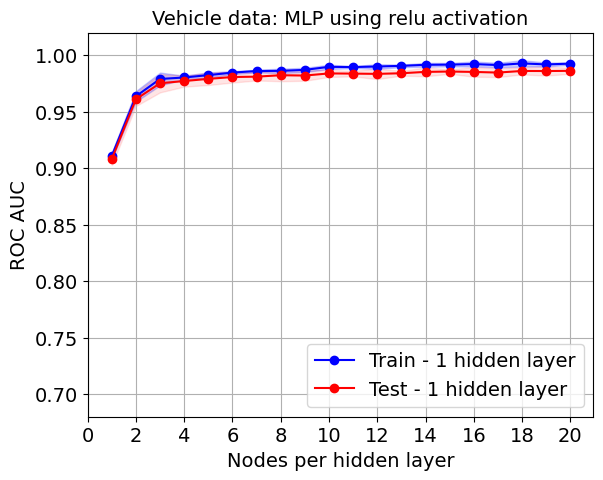

In [104]:
X_train = X_train_km_enhanced

#activation_list = ['logistic', 'tanh', 'relu']
activation_list = ['relu']

for activation in activation_list:
    
    print(activation)
    
    ########################
    ## 1 hidden layers
    ########################
    
    train_acc_m = []
    train_acc_std = []
    test_acc_m = []
    test_acc_std = []

    train_roc_m = []
    train_roc_std = []
    test_roc_m = []
    test_roc_std = []
    
    alpha = 0.0001 # default 0.0001
    max_iter = 4000 # default 200
    hidden_layers = 1
    print(f'MLP with {hidden_layers} hidden layers')
    
    nodes_list = list(range(1,21,1))
    
    for nodes in nodes_list:
        #print(f'{nodes} nodes')
        hidden_layer_sizes = tuple([nodes])*hidden_layers
        clf = MLPClassifier(solver='adam', alpha=alpha,
                            hidden_layer_sizes=hidden_layer_sizes, 
                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
        
        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                                n_jobs=5)
        
    #    for estimator in scores['estimator']:
    #        print(estimator.loss_)
        
        # train and test accuracy
        train_acc_m.append(np.mean(scores['train_accuracy']))
        train_acc_std.append(np.std(scores['train_accuracy']))
        test_acc_m.append(np.mean(scores['test_accuracy']))  
        test_acc_std.append(np.std(scores['test_accuracy']))
                            
        # train and test roc auc
        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
    
    train_acc_m_mlp1 = np.asarray(train_acc_m)
    train_acc_std_mlp1 = np.asarray(train_acc_std)
    test_acc_m_mlp1 = np.asarray(test_acc_m)
    test_acc_std_mlp1 = np.asarray(test_acc_std) 
    
    train_roc_m_mlp1 = np.asarray(train_roc_m)
    train_roc_std_mlp1 = np.asarray(train_roc_std)
    test_roc_m_mlp1 = np.asarray(test_roc_m)
    test_roc_std_mlp1 = np.asarray(test_roc_std)
    
    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
#    ########################
#    ## 2 hidden layers
#    ########################
#    
#    train_acc_m = []
#    train_acc_std = []
#    test_acc_m = []
#    test_acc_std = []
#    
#    train_roc_m = []
#    train_roc_std = []
#    test_roc_m = []
#    test_roc_std = []
#    
#    alpha = 0.0001 # default 0.0001
#    max_iter = 4000 # default 200
#    hidden_layers = 2
#    print(f'MLP with {hidden_layers} hidden layers')
#    
#    nodes_list = list(range(1,21,1))
#    
#    for nodes in nodes_list:
#    #    print(f'{nodes} nodes')
#        hidden_layer_sizes = tuple([nodes])*hidden_layers
#        clf = MLPClassifier(solver='adam', alpha=alpha,
#                            hidden_layer_sizes=hidden_layer_sizes, 
#                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
#        
#        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
#                                n_jobs=8)
#        
#    #    for estimator in scores['estimator']:
#    #        print(estimator.loss_)
#        
#        # train and test accuracy
#        train_acc_m.append(np.mean(scores['train_accuracy']))
#        train_acc_std.append(np.std(scores['train_accuracy']))
#        test_acc_m.append(np.mean(scores['test_accuracy']))  
#        test_acc_std.append(np.std(scores['test_accuracy']))
#                            
#        # train and test roc auc
#        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
#        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
#        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
#        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
#    
#    train_acc_m_mlp2 = np.asarray(train_acc_m)
#    train_acc_std_mlp2 = np.asarray(train_acc_std)
#    test_acc_m_mlp2 = np.asarray(test_acc_m)
#    test_acc_std_mlp2 = np.asarray(test_acc_std) 
#    
#    train_roc_m_mlp2 = np.asarray(train_roc_m)
#    train_roc_std_mlp2 = np.asarray(train_roc_std)
#    test_roc_m_mlp2 = np.asarray(test_roc_m)
#    test_roc_std_mlp2 = np.asarray(test_roc_std)
#    
#    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
#    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
#    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
    fontsize = 14

    # roc_auc
    fig = plt.figure()
    ax = fig.add_axes([0.15, 0.14, 0.79, 0.80])
    # Uniform weights
    ax.plot(nodes_list, train_roc_m_mlp1, 'o-', color='b', label='Train - 1 hidden layer')
    ax.fill_between(nodes_list, train_roc_m_mlp1 - 2*train_roc_std_mlp1, train_roc_m_mlp1 + 2*train_roc_std_mlp1, 
                    alpha=0.2, color="b")
    
    ax.plot(nodes_list, test_roc_m_mlp1, 'o-', color='r', label='Test - 1 hidden layer')
    ax.fill_between(nodes_list, test_roc_m_mlp1 - 2*test_roc_std_mlp1, test_roc_m_mlp1 + 2*test_roc_std_mlp1, 
                    alpha=0.1, color="r")
    
#    # Distance weights
#    ax.plot(nodes_list, train_roc_m_mlp2, 'o-', color='k', markerfacecolor='none', label='Train - 2 hidden layers')
#    ax.fill_between(nodes_list, train_roc_m_mlp2 - 2*train_roc_std_mlp2, train_roc_m_mlp2 + 2*train_roc_std_mlp2, 
#                    alpha=0.1, color="k")
#    
#    ax.plot(nodes_list, test_roc_m_mlp2, 'o-', color='g', markerfacecolor='none', label='Test - 2 hidden layers')
#    ax.fill_between(nodes_list, test_roc_m_mlp2 - 2*test_roc_std_mlp2, test_roc_m_mlp2 + 2*test_roc_std_mlp2, 
#                    alpha=0.2, color="g")
#    
    ax.legend(fontsize=fontsize, loc='lower right')
    ax.tick_params(labelsize=fontsize)
    ax.set_title(f'Vehicle data: MLP using {activation} activation', fontsize=fontsize) 
    ax.set_xlabel('Nodes per hidden layer', fontsize=fontsize) 
    ax.set_ylabel('ROC AUC', fontsize=fontsize) 
    ax.set_ylim(0.68, 1.02)
    ax.set_xticks(list(range(0,22,2)))
    plt.grid(True)
    plt.show()
#    fig.savefig(f'mlp-roc_auc-nodes-{activation}.png')
    plt.close(fig)

    
    train_roc_m_km = train_roc_m_mlp1
    test_roc_m_km  = test_roc_m_mlp1

    train_roc_std_km = train_roc_std_mlp1
    test_roc_std_km  = test_roc_std_mlp1
    

In [96]:
# Learning curve with respect to training set size
# Validation set remains the same

X_train = X_train_km_enhanced
X_test = X_test_km_enhanced

# MLP learning curves
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=[12], 
                    activation='relu', random_state=seed, max_iter=4000, tol=1e-6)
train_sizes = np.arange(5,105,5)*0.01*X_train.shape[0]*0.80
train_sizes = train_sizes.astype(int)
train_sizes_mlp, train_scores_km, validation_scores_km = learning_curve(
estimator = clf,
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'roc_auc_ovr', shuffle = True, n_jobs=16, random_state=seed)

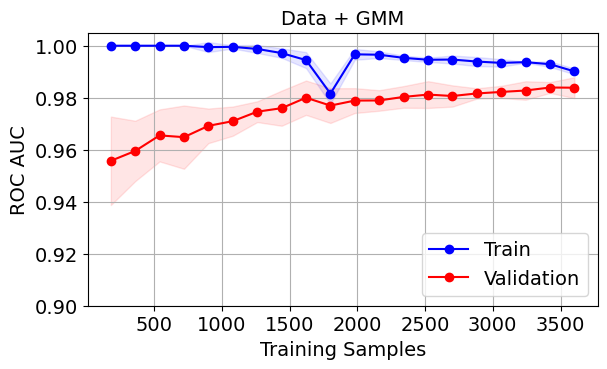

In [97]:
train_mean = train_scores_km.mean(axis = 1)
train_std =  train_scores_km.std(axis = 1)
test_mean = validation_scores_km.mean(axis = 1)
test_std =  validation_scores_km.std(axis = 1)

fontsize = 14
fig = plt.figure(figsize=(6,3.5))
ax = fig.add_axes([0.13, 0.15, 0.85, 0.78])
ax.plot(train_sizes_mlp, train_mean, '-o', label='Train', color="b")
ax.fill_between(train_sizes_mlp, train_mean - 2*train_std, train_mean + 2*train_std, 
                alpha=0.1, color="b")
ax.plot(train_sizes_mlp, test_mean, '-o', label='Validation', color="r")
ax.fill_between(train_sizes_mlp, test_mean - 2*test_std, test_mean + 2*test_std, 
                alpha=0.1, color="r")
ax.legend(fontsize=fontsize, loc="lower right")
ax.tick_params(labelsize=fontsize)
ax.set_title('Data + GMM', fontsize=fontsize) 
ax.set_xlabel('Training Samples', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize) 
#ax.set_xlim(0, 500)
ax.set_ylim(0.90, 1.005)
#ax.set_xticks(np.arange(0,600,100))
#ax.set_yticks(np.arange(0.60,1.05,0.05))
plt.grid(True)
plt.show()
fig.savefig('NN_KM_learning_curves.png')
plt.close(fig)

In [151]:
X_train = X_train_km_enhanced
X_test = X_test_km_enhanced

# MLP
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=[12], 
                    activation='relu', random_state=seed, max_iter=4000, tol=1e-6)

tic = time.perf_counter()
clf.fit(X_train, y_train)
toc = time.perf_counter()
mlp_train_time = toc-tic
train_iter = clf.n_iter_
loss_curve_km = clf.loss_curve_

tic = time.perf_counter()
y_pred_train_mlp = clf.predict(X_train)
toc = time.perf_counter()
mlp_pred_train_time = toc-tic

tic = time.perf_counter()
y_pred_test_mlp = clf.predict(X_test)
toc = time.perf_counter()
mlp_pred_test_time = toc-tic

train_acc_mlp = accuracy_score(y_train, y_pred_train_mlp)
test_acc_mlp = accuracy_score(y_test, y_pred_test_mlp)

train_roc_mlp = roc_auc_score(y_train, clf.predict_proba(X_train), average='macro', multi_class='ovr')
test_roc_mlp = roc_auc_score(y_test, clf.predict_proba(X_test), average='macro', multi_class='ovr')

print('\nMLP training and test')
print(f'Feature components: {X_train.shape[1]}')
print(f'train accuracy: {train_acc_mlp}') 
print(f'train roc_auc: {train_roc_mlp}')
print(f'test accuracy: {test_acc_mlp}')
print(f'test roc_auc: {test_roc_mlp}') 

print(f'\nIterations to train: {train_iter}')
print(f'Time to train: {mlp_train_time}')
#print(f'Time to predict training set: {mlp_pred_train_time}') 
#print(f'Time to predict test set: {mlp_pred_test_time}') 


MLP training and test
Feature components: 40
train accuracy: 0.9296181172291297
train roc_auc: 0.9929338571966433
test accuracy: 0.8891765924391507
test roc_auc: 0.9817469426603029

Iterations to train: 793
Time to train: 7.212205399991944


relu
MLP with 1 hidden layers
MLP with 1 hidden layers cross validation for number of nodes per hidden layer
Maximum roc_auc score: 0.9868100884271499 at 20 nodes
Maximum accuracy score: 0.8969801455173265 at 20 nodes


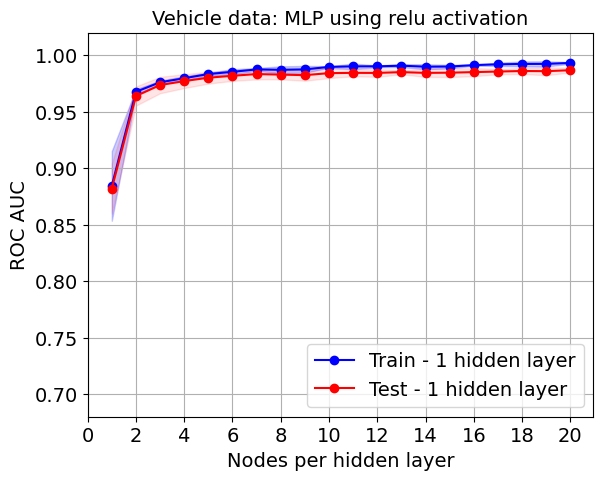

In [105]:
X_train = X_train_gmm_enhanced

#activation_list = ['logistic', 'tanh', 'relu']
activation_list = ['relu']

for activation in activation_list:
    
    print(activation)
    
    ########################
    ## 1 hidden layers
    ########################
    
    train_acc_m = []
    train_acc_std = []
    test_acc_m = []
    test_acc_std = []

    train_roc_m = []
    train_roc_std = []
    test_roc_m = []
    test_roc_std = []
    
    alpha = 0.0001 # default 0.0001
    max_iter = 4000 # default 200
    hidden_layers = 1
    print(f'MLP with {hidden_layers} hidden layers')
    
    nodes_list = list(range(1,21,1))
    
    for nodes in nodes_list:
        #print(f'{nodes} nodes')
        hidden_layer_sizes = tuple([nodes])*hidden_layers
        clf = MLPClassifier(solver='adam', alpha=alpha,
                            hidden_layer_sizes=hidden_layer_sizes, 
                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
        
        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
                                n_jobs=5)
        
    #    for estimator in scores['estimator']:
    #        print(estimator.loss_)
        
        # train and test accuracy
        train_acc_m.append(np.mean(scores['train_accuracy']))
        train_acc_std.append(np.std(scores['train_accuracy']))
        test_acc_m.append(np.mean(scores['test_accuracy']))  
        test_acc_std.append(np.std(scores['test_accuracy']))
                            
        # train and test roc auc
        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
    
    train_acc_m_mlp1 = np.asarray(train_acc_m)
    train_acc_std_mlp1 = np.asarray(train_acc_std)
    test_acc_m_mlp1 = np.asarray(test_acc_m)
    test_acc_std_mlp1 = np.asarray(test_acc_std) 
    
    train_roc_m_mlp1 = np.asarray(train_roc_m)
    train_roc_std_mlp1 = np.asarray(train_roc_std)
    test_roc_m_mlp1 = np.asarray(test_roc_m)
    test_roc_std_mlp1 = np.asarray(test_roc_std)
    
    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
#    ########################
#    ## 2 hidden layers
#    ########################
#    
#    train_acc_m = []
#    train_acc_std = []
#    test_acc_m = []
#    test_acc_std = []
#    
#    train_roc_m = []
#    train_roc_std = []
#    test_roc_m = []
#    test_roc_std = []
#    
#    alpha = 0.0001 # default 0.0001
#    max_iter = 4000 # default 200
#    hidden_layers = 2
#    print(f'MLP with {hidden_layers} hidden layers')
#    
#    nodes_list = list(range(1,21,1))
#    
#    for nodes in nodes_list:
#    #    print(f'{nodes} nodes')
#        hidden_layer_sizes = tuple([nodes])*hidden_layers
#        clf = MLPClassifier(solver='adam', alpha=alpha,
#                            hidden_layer_sizes=hidden_layer_sizes, 
#                            activation=activation, random_state=seed, max_iter=max_iter, tol=1e-6)
#        
#        scores = cross_validate(clf, X_train, y_train, cv=5, scoring = ['accuracy','roc_auc_ovr'], return_train_score=True, 
#                                n_jobs=8)
#        
#    #    for estimator in scores['estimator']:
#    #        print(estimator.loss_)
#        
#        # train and test accuracy
#        train_acc_m.append(np.mean(scores['train_accuracy']))
#        train_acc_std.append(np.std(scores['train_accuracy']))
#        test_acc_m.append(np.mean(scores['test_accuracy']))  
#        test_acc_std.append(np.std(scores['test_accuracy']))
#                            
#        # train and test roc auc
#        train_roc_m.append(np.mean(scores['train_roc_auc_ovr']))
#        train_roc_std.append(np.std(scores['train_roc_auc_ovr']))                                        
#        test_roc_m.append(np.mean(scores['test_roc_auc_ovr']))
#        test_roc_std.append(np.std(scores['test_roc_auc_ovr']))
#    
#    train_acc_m_mlp2 = np.asarray(train_acc_m)
#    train_acc_std_mlp2 = np.asarray(train_acc_std)
#    test_acc_m_mlp2 = np.asarray(test_acc_m)
#    test_acc_std_mlp2 = np.asarray(test_acc_std) 
#    
#    train_roc_m_mlp2 = np.asarray(train_roc_m)
#    train_roc_std_mlp2 = np.asarray(train_roc_std)
#    test_roc_m_mlp2 = np.asarray(test_roc_m)
#    test_roc_std_mlp2 = np.asarray(test_roc_std)
#    
#    print(f'MLP with {hidden_layers} hidden layers cross validation for number of nodes per hidden layer')
#    print(f'Maximum roc_auc score: {max(test_roc_m)} at {nodes_list[test_roc_m.index(max(test_roc_m))]} nodes')
#    print(f'Maximum accuracy score: {max(test_acc_m)} at {nodes_list[test_acc_m.index(max(test_acc_m))]} nodes')
    
    fontsize = 14

    # roc_auc
    fig = plt.figure()
    ax = fig.add_axes([0.15, 0.14, 0.79, 0.80])
    # Uniform weights
    ax.plot(nodes_list, train_roc_m_mlp1, 'o-', color='b', label='Train - 1 hidden layer')
    ax.fill_between(nodes_list, train_roc_m_mlp1 - 2*train_roc_std_mlp1, train_roc_m_mlp1 + 2*train_roc_std_mlp1, 
                    alpha=0.2, color="b")
    
    ax.plot(nodes_list, test_roc_m_mlp1, 'o-', color='r', label='Test - 1 hidden layer')
    ax.fill_between(nodes_list, test_roc_m_mlp1 - 2*test_roc_std_mlp1, test_roc_m_mlp1 + 2*test_roc_std_mlp1, 
                    alpha=0.1, color="r")
    
#    # Distance weights
#    ax.plot(nodes_list, train_roc_m_mlp2, 'o-', color='k', markerfacecolor='none', label='Train - 2 hidden layers')
#    ax.fill_between(nodes_list, train_roc_m_mlp2 - 2*train_roc_std_mlp2, train_roc_m_mlp2 + 2*train_roc_std_mlp2, 
#                    alpha=0.1, color="k")
#    
#    ax.plot(nodes_list, test_roc_m_mlp2, 'o-', color='g', markerfacecolor='none', label='Test - 2 hidden layers')
#    ax.fill_between(nodes_list, test_roc_m_mlp2 - 2*test_roc_std_mlp2, test_roc_m_mlp2 + 2*test_roc_std_mlp2, 
#                    alpha=0.2, color="g")
#    
    ax.legend(fontsize=fontsize, loc='lower right')
    ax.tick_params(labelsize=fontsize)
    ax.set_title(f'Vehicle data: MLP using {activation} activation', fontsize=fontsize) 
    ax.set_xlabel('Nodes per hidden layer', fontsize=fontsize) 
    ax.set_ylabel('ROC AUC', fontsize=fontsize) 
    ax.set_ylim(0.68, 1.02)
    ax.set_xticks(list(range(0,22,2)))
    plt.grid(True)
    plt.show()
#    fig.savefig(f'mlp-roc_auc-nodes-{activation}.png')
    plt.close(fig)

    
    train_roc_m_gmm = train_roc_m_mlp1
    test_roc_m_gmm  = test_roc_m_mlp1

    train_roc_std_gmm = train_roc_std_mlp1
    test_roc_std_gmm  = test_roc_std_mlp1
    

In [94]:
# Learning curve with respect to training set size
# Validation set remains the same

X_train = X_train_gmm_enhanced
X_test = X_test_gmm_enhanced

# MLP learning curves
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=[12], 
                    activation='relu', random_state=seed, max_iter=4000, tol=1e-6)
train_sizes = np.arange(5,105,5)*0.01*X_train.shape[0]*0.80
train_sizes = train_sizes.astype(int)
train_sizes_mlp, train_scores_gmm, validation_scores_gmm = learning_curve(
estimator = clf,
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'roc_auc_ovr', shuffle = True, n_jobs=16, random_state=seed)

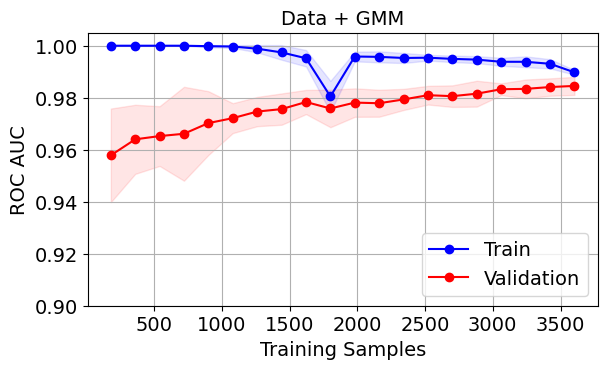

In [95]:
train_mean = train_scores_gmm.mean(axis = 1)
train_std =  train_scores_gmm.std(axis = 1)
test_mean = validation_scores_gmm.mean(axis = 1)
test_std =  validation_scores_gmm.std(axis = 1)

fontsize = 14
fig = plt.figure(figsize=(6,3.5))
ax = fig.add_axes([0.13, 0.15, 0.85, 0.78])
ax.plot(train_sizes_mlp, train_mean, '-o', label='Train', color="b")
ax.fill_between(train_sizes_mlp, train_mean - 2*train_std, train_mean + 2*train_std, 
                alpha=0.1, color="b")
ax.plot(train_sizes_mlp, test_mean, '-o', label='Validation', color="r")
ax.fill_between(train_sizes_mlp, test_mean - 2*test_std, test_mean + 2*test_std, 
                alpha=0.1, color="r")
ax.legend(fontsize=fontsize, loc="lower right")
ax.tick_params(labelsize=fontsize)
ax.set_title('Data + GMM', fontsize=fontsize) 
ax.set_xlabel('Training Samples', fontsize=fontsize) 
ax.set_ylabel('ROC AUC', fontsize=fontsize) 
#ax.set_xlim(0, 500)
ax.set_ylim(0.90, 1.005)
#ax.set_xticks(np.arange(0,600,100))
#ax.set_yticks(np.arange(0.60,1.05,0.05))
plt.grid(True)
plt.show()
fig.savefig('NN_GMM_learning_curves.png')
plt.close(fig)

In [152]:
X_train = X_train_gmm_enhanced
X_test = X_test_gmm_enhanced

# MLP
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=[12], 
                    activation='relu', random_state=seed, max_iter=4000, tol=1e-6)

tic = time.perf_counter()
clf.fit(X_train, y_train)
toc = time.perf_counter()
mlp_train_time = toc-tic
train_iter = clf.n_iter_
loss_curve_gmm = clf.loss_curve_

tic = time.perf_counter()
y_pred_train_mlp = clf.predict(X_train)
toc = time.perf_counter()
mlp_pred_train_time = toc-tic

tic = time.perf_counter()
y_pred_test_mlp = clf.predict(X_test)
toc = time.perf_counter()
mlp_pred_test_time = toc-tic

train_acc_mlp = accuracy_score(y_train, y_pred_train_mlp)
test_acc_mlp = accuracy_score(y_test, y_pred_test_mlp)

train_roc_mlp = roc_auc_score(y_train, clf.predict_proba(X_train), average='macro', multi_class='ovr')
test_roc_mlp = roc_auc_score(y_test, clf.predict_proba(X_test), average='macro', multi_class='ovr')

print('\nMLP training and test')
print(f'Feature components: {X_train.shape[1]}')
print(f'train accuracy: {train_acc_mlp}') 
print(f'train roc_auc: {train_roc_mlp}')
print(f'test accuracy: {test_acc_mlp}')
print(f'test roc_auc: {test_roc_mlp}') 

print(f'\nIterations to train: {train_iter}')
print(f'Time to train: {mlp_train_time}')
#print(f'Time to predict training set: {mlp_pred_train_time}') 
#print(f'Time to predict test set: {mlp_pred_test_time}') 


MLP training and test
Feature components: 38
train accuracy: 0.9345026642984015
train roc_auc: 0.9934668314837225
test accuracy: 0.8788192646297255
test roc_auc: 0.9803280369326665

Iterations to train: 804
Time to train: 7.53095080005005


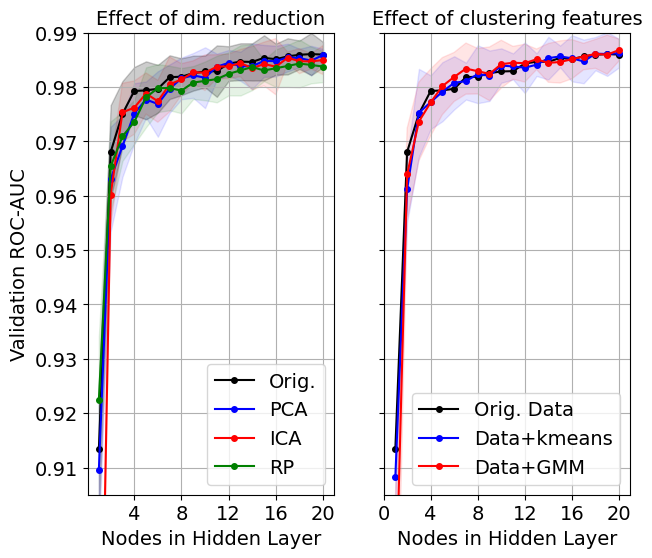

In [143]:
fontsize = 14
markersize = 4
# roc_auc

fontsize = 14
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 6.0))

ax.plot(nodes_list, test_roc_m_orig, '-o', color='black', label='Orig.', markersize=markersize)
ax.fill_between(nodes_list, test_roc_m_orig - 2*test_roc_std_orig, test_roc_m_orig + 2*test_roc_std_orig, alpha=0.1, color="k")

ax.plot(nodes_list, test_roc_m_pca, '-o', color='blue', label='PCA', markersize=markersize)
ax.fill_between(nodes_list, test_roc_m_pca - 2*test_roc_std_pca, test_roc_m_pca + 2*test_roc_std_pca, alpha=0.1, color="b")

ax.plot(nodes_list, test_roc_m_ica, '-o', color='red', label='ICA', markersize=markersize)
ax.fill_between(nodes_list, test_roc_m_ica - 2*test_roc_std_ica, test_roc_m_ica + 2*test_roc_std_ica, alpha=0.1, color="r")

ax.plot(nodes_list, test_roc_m_rp, '-o', color='green', label='RP', markersize=markersize)
ax.fill_between(nodes_list, test_roc_m_rp - 2*test_roc_std_rp, test_roc_m_rp + 2*test_roc_std_rp, alpha=0.1, color="g")

ax.legend(fontsize=fontsize, loc='lower right')
ax.tick_params(labelsize=fontsize)
ax.set_title(f'Effect of dim. reduction', fontsize=fontsize) 
ax.set_xlabel('Nodes in Hidden Layer', fontsize=fontsize) 
ax.set_ylabel('Validation ROC-AUC', fontsize=fontsize) 
ax2.set_ylim(0.905, 0.99)
ax.set_xticks(list(range(0,24,4)))
ax.grid(True)

#fig = plt.figure()
#ax = fig.add_axes([0.15, 0.14, 0.79, 0.80])

ax2.plot(nodes_list, test_roc_m_orig, '-o', color='black', label='Orig. Data', markersize=markersize)
ax.fill_between(nodes_list, test_roc_m_orig - 2*test_roc_std_orig, test_roc_m_orig + 2*test_roc_std_orig, alpha=0.1, color="k")

ax2.plot(nodes_list, test_roc_m_km, '-o', color='blue', label='Data+kmeans', markersize=markersize)
ax2.fill_between(nodes_list, test_roc_m_km - 2*test_roc_std_km, test_roc_m_km + 2*test_roc_std_km, alpha=0.1, color="b")

ax2.plot(nodes_list, test_roc_m_gmm, '-o', color='red', label='Data+GMM', markersize=markersize)
ax2.fill_between(nodes_list, test_roc_m_gmm - 2*test_roc_std_gmm, test_roc_m_gmm + 2*test_roc_std_gmm, alpha=0.1, color="r")

ax2.legend(fontsize=fontsize, loc='lower right')
ax2.tick_params(labelsize=fontsize)
ax2.set_title(f'Effect of clustering features', fontsize=fontsize) 
ax2.set_xlabel('Nodes in Hidden Layer', fontsize=fontsize) 
#ax2.set_ylabel('Validation ROC-AUC', fontsize=fontsize) 
ax2.set_ylim(0.905, 0.99)
ax2.set_xticks(list(range(0,24,4)))
ax2.grid(True)
plt.show()
fig.savefig(f'NN_validation_curves.png')
plt.close(fig)

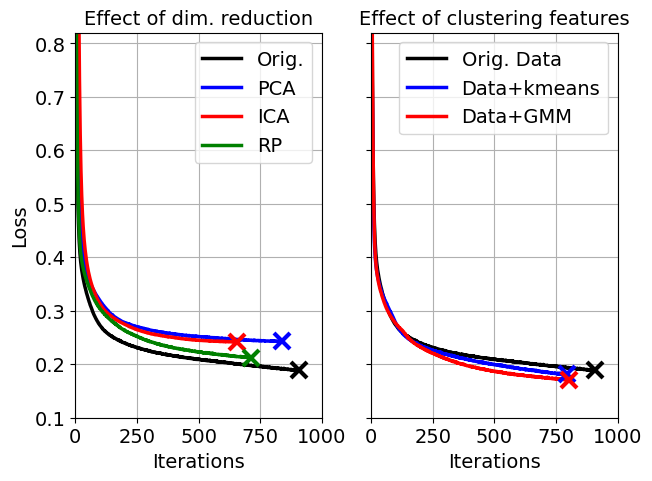

In [144]:
# Comparison of iterative learning curves


fontsize = 14
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 5.0))


ax.plot(range(len(loss_curve_orig)), loss_curve_orig, color='black', label='Orig.', linewidth = 2.5)
ax.plot(range(len(loss_curve_pca)), loss_curve_pca, color='blue', label='PCA', linewidth = 2.5)
ax.plot(range(len(loss_curve_ica)), loss_curve_ica, color='red', label='ICA', linewidth = 2.5)
ax.plot(range(len(loss_curve_rp)), loss_curve_rp, color='green', label='RP', linewidth = 2.5)

ax.plot(len(loss_curve_orig), loss_curve_orig[-1], 'x', color='black', markersize=12, markeredgewidth=3)
ax.plot(len(loss_curve_pca), loss_curve_pca[-1], 'x',   color='blue', markersize=12, markeredgewidth=3)
ax.plot(len(loss_curve_ica), loss_curve_ica[-1], 'x',  color='red', markersize=12, markeredgewidth=3)
ax.plot(len(loss_curve_rp), loss_curve_rp[-1], 'x', color='green', markersize=12, markeredgewidth=3)

ax.tick_params(labelsize=fontsize)
ax.set_title('Effect of dim. reduction', fontsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Loss', fontsize=fontsize)
#ax.set_xticks([1]+list(range(6,42,6)))
#ax.set_yticks(np.arange(0.2,1.1,0.1))
ax.set_xlim((0,1000))
ax.set_ylim((0.1,0.82))
ax.legend(fontsize=fontsize, loc="upper right")
ax.grid(True)

#fig = plt.figure(figsize=(3.5,5))
#ax = fig.add_axes([0.24, 0.14, 0.7, 0.80])
ax2.plot(range(len(loss_curve_orig)), loss_curve_orig, color='black', label='Orig. Data', linewidth = 2.5)
ax2.plot(range(len(loss_curve_km)), loss_curve_km, color='blue', label='Data+kmeans', linewidth = 2.5)
ax2.plot(range(len(loss_curve_gmm)), loss_curve_gmm, color='red', label='Data+GMM', linewidth = 2.5)

ax2.plot(len(loss_curve_orig), loss_curve_orig[-1], 'x', color='black', markersize=12, markeredgewidth=3)
ax2.plot(len(loss_curve_km), loss_curve_km[-1], 'x',   color='blue', markersize=12, markeredgewidth=3)
ax2.plot(len(loss_curve_gmm), loss_curve_gmm[-1], 'x',  color='red', markersize=12, markeredgewidth=3)

ax2.tick_params(labelsize=fontsize)
ax2.set_title('Effect of clustering features', fontsize=fontsize)
ax2.set_xlabel('Iterations', fontsize=fontsize) 
#ax2.set_ylabel('Loss', fontsize=fontsize)
#ax.set_xticks([1]+list(range(6,42,6)))
#ax.set_yticks(np.arange(0.2,1.1,0.1))
ax2.set_xlim((0,1000))
ax2.set_ylim((0.1,0.82))
ax2.legend(fontsize=fontsize, loc="upper right")
ax2.grid(True)
plt.show()
fig.savefig('NN_iter_learn2.png')
plt.close(fig)
